In [966]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM, GRU
from tensorflow import keras
import tensorflow as tf
from datetime import datetime

In [967]:
dataset = read_csv("folder/subfolder/dataToModel.csv",
                 #  parse_dates={'dt' : ['Time']},
                  # infer_datetime_format=True, 
                   index_col= 0,
                   #na_values=['nan','?'],
                   sep=";")
#dataset.fillna(0, inplace=True)
values = dataset.values
# ensure all data is float
values = values.astype('float32')

In [968]:
dataset.head(4)

rok  ms  dz  godz  fco2_MQ  fco2_HQ  fco2_raw  glwody  T50cm  T2m  ...  \
0  2013   1   1   0.5     0.15      0.0      0.15     5.2    1.2  1.5  ...   
1  2013   1   1   1.5    -0.60      0.0     -0.60     5.2    0.9  1.2  ...   
2  2013   1   1   2.5     0.57      0.0      0.57     5.4    0.7  1.0  ...   
3  2013   1   1   3.5     0.03      0.0      0.03     5.5    0.3  0.6  ...   

    Ku     Ld     Lu    ppp    v   vdir  Tgrunt    vwc  PARd  PARu  
0  0.9  249.3  322.9  998.5  3.4  210.5     0.6  0.785   0.0   0.0  
1  1.0  249.5  323.5  998.1  3.3  202.5     0.6  0.785   0.0   0.0  
2  1.0  249.7  324.0  997.6  3.3  201.6     0.6  0.785   0.0   0.0  
3  0.9  250.0  324.5  997.2  2.6  191.6     0.6  0.785   0.0   0.0  

[4 rows x 21 columns]

In [969]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [970]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok','T50cm','T2m','v','vdir','Tgrunt','vwc','PARd','PARu',"Ku",'Lu'], inplace = True)
#dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
#dataset.drop(columns  = [ 'fMOD_NN', 'fMOD_E0', 'fMODlut', 'fMODsrr','dz','godz','ms','fco2_MQ'], inplace = True)

In [971]:
dataset.head()

fco2_HQ  fco2_raw  glwody   Kd     Ld    ppp
0      0.0      0.15     5.2  0.0  249.3  998.5
1      0.0     -0.60     5.2  0.0  249.5  998.1
2      0.0      0.57     5.4  0.0  249.7  997.6
3      0.0      0.03     5.5  0.0  250.0  997.2
4      0.0      0.03     5.5  0.0  250.2  996.8

In [972]:
dataset.drop(columns =[] , inplace = True)

In [973]:
#final dataset
dataset.head(2220)

fco2_HQ  fco2_raw  glwody     Kd     Ld     ppp
0         0.0      0.15     5.2    0.0  249.3   998.5
1         0.0     -0.60     5.2    0.0  249.5   998.1
2         0.0      0.57     5.4    0.0  249.7   997.6
3         0.0      0.03     5.5    0.0  250.0   997.2
4         0.0      0.03     5.5    0.0  250.2   996.8
...       ...       ...     ...    ...    ...     ...
2215      1.0     -5.00     3.6  665.8  327.0  1001.2
2216      1.0     -6.26     3.4  770.0  332.4  1000.9
2217      1.0     -0.04     3.2  841.9  337.6  1000.9
2218      0.0     -2.90     3.1  876.3  340.0  1000.7
2219      0.0     -5.18     3.2  856.8  344.3  1000.6

[2220 rows x 6 columns]

In [974]:
values = dataset.values
# ensure all data is float
values = values.astype('float64')

In [1319]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled =pd.DataFrame(scaled)

In [1470]:
scaled.head(2215)

0         1         2         3         4         5    6    7
0     0.0  0.518109  0.869646  0.000000  0.334327  0.535762  0.0  0.0
1     0.0  0.517643  0.869646  0.000000  0.334990  0.530364  0.0  0.0
2     0.0  0.518370  0.871508  0.000000  0.335653  0.523617  0.0  0.0
3     0.0  0.518034  0.872439  0.000000  0.336647  0.518219  0.0  0.0
4     0.0  0.518034  0.872439  0.000000  0.337309  0.512821  0.0  0.0
...   ...       ...       ...       ...       ...       ...  ...  ...
2211  0.0  0.524734  0.855680  0.075787  0.570577  0.562753  0.0  0.0
2212  0.0  0.515447  0.855680  0.207257  0.539099  0.566802  1.0  1.0
2213  1.0  0.514258  0.852886  0.391698  0.541087  0.573549  1.0  1.0
2214  1.0  0.515745  0.852886  0.539049  0.564944  0.574899  1.0  1.0
2215  1.0  0.514905  0.854749  0.669213  0.591783  0.572200  1.0  1.0

[2215 rows x 8 columns]

In [1473]:
scaled.drop([6], axis=1)

0         1         2    3         4         5    7
0      0.0  0.518109  0.869646  0.0  0.334327  0.535762  0.0
1      0.0  0.517643  0.869646  0.0  0.334990  0.530364  0.0
2      0.0  0.518370  0.871508  0.0  0.335653  0.523617  0.0
3      0.0  0.518034  0.872439  0.0  0.336647  0.518219  0.0
4      0.0  0.518034  0.872439  0.0  0.337309  0.512821  0.0
...    ...       ...       ...  ...       ...       ...  ...
40335  0.0  0.518010  0.723464  0.0  0.497349  0.719298  0.0
40336  0.0  0.518022  0.723464  0.0  0.501657  0.720648  0.0
40337  0.0  0.518016  0.723464  0.0  0.508615  0.716599  0.0
40338  0.0  0.518016  0.725326  0.0  0.512260  0.715250  0.0
40339  0.0  0.518022  0.725326  0.0  0.516899  0.712551  0.0

[40339 rows x 7 columns]

In [1474]:
def create_ts_data(dataset, lookback=1, predicted_col=0):
    temp=dataset.copy()
    temp["id"]= range(1, len(temp)+1)
    temp = temp.iloc[:-lookback, :]
    temp.set_index('id', inplace =True)
    predicted_value=dataset.copy()
    predicted_value = predicted_value.iloc[lookback:,predicted_col]
    predicted_value.columns=["Predcited"]
    predicted_value= pd.DataFrame(predicted_value)
    
    predicted_value["id"]= range(1, len(predicted_value)+1)
    predicted_value.set_index('id', inplace =True)
    final_df= pd.concat([temp, predicted_value], axis=1)
    #final_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)','var1(t)']
    #final_df.set_index('Date', inplace=True)
    return final_df

In [1476]:
#We now create the time series dataset with looking back one time step

reframed_df= create_ts_data(scaled, 1,0)
reframed_df.fillna(0, inplace=True)

#reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)',  'var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)','var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)','var18(t-1)']
#reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)','var4(t-1)']
#print(reframed_df.head(4))

In [1477]:
# split into train and test sets
values = reframed_df.values
training_sample =int( len(dataset) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
testDataset=DataFrame.to_numpy(reframed_df)
print(testDataset)

[[0.         0.51810909 0.86964618 ... 0.         0.         0.        ]
 [0.         0.51764252 0.86964618 ... 0.         0.         0.        ]
 [0.         0.51837037 0.87150838 ... 0.         0.         0.        ]
 ...
 [0.         0.518022   0.72346369 ... 0.         0.         0.        ]
 [0.         0.51801578 0.72346369 ... 0.         0.         0.        ]
 [0.         0.51801578 0.72532588 ... 0.         0.         0.        ]]


In [1501]:
print(testDataset.shape)

(40338, 9)


In [1479]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fco2_HQ   40342 non-null  float64
 1   fco2_raw  40342 non-null  float64
 2   glwody    40342 non-null  float64
 3   Kd        40342 non-null  float64
 4   Ld        40342 non-null  float64
 5   ppp       40342 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


In [1480]:
dataset.shape

(40342, 6)

In [1481]:
list0 = []
list1 = []
i=0
#agroup=0
#list1.append(0)
#for window in dataset.rolling(window=3):
for window in scaled.rolling(window=3):
    #print(window)
    print(window.shape)
   
    if(window.shape==(3,window.shape[1])):
        i+=1
        print("XD "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        #print(window[0])
      
        #for test in range(shape[0]) :
        for index, test in window.iterrows() :
            print(y)
            if (y==2) :
                print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1
       # for index2, test2 in window.iterrows() :
        #    test2[0]=agroup
         #   print(test2[0])
            
        
        

#list1.append(0)

(1, 8)
(2, 8)
(3, 8)
XD 1
0
1
2
0.0
(3, 8)
XD 2
0
1
2
0.0
(3, 8)
XD 3
0
1
2
0.0
(3, 8)
XD 4
0
1
2
0.0
(3, 8)
XD 5
0
1
2
0.0
(3, 8)
XD 6
0
1
2
0.0
(3, 8)
XD 7
0
1
2
0.0
(3, 8)
XD 8
0
1
2
0.0
(3, 8)
XD 9
0
1
2
0.0
(3, 8)
XD 10
0
1
2
0.0
(3, 8)
XD 11
0
1
2
0.0
(3, 8)
XD 12
0
1
2
0.0
(3, 8)
XD 13
0
1
2
0.0
(3, 8)
XD 14
0
1
2
0.0
(3, 8)
XD 15
0
1
2
0.0
(3, 8)
XD 16
0
1
2
0.0
(3, 8)
XD 17
0
1
2
0.0
(3, 8)
XD 18
0
1
2
0.0
(3, 8)
XD 19
0
1
2
0.0
(3, 8)
XD 20
0
1
2
0.0
(3, 8)
XD 21
0
1
2
0.0
(3, 8)
XD 22
0
1
2
0.0
(3, 8)
XD 23
0
1
2
0.0
(3, 8)
XD 24
0
1
2
0.0
(3, 8)
XD 25
0
1
2
0.0
(3, 8)
XD 26
0
1
2
0.0
(3, 8)
XD 27
0
1
2
0.0
(3, 8)
XD 28
0
1
2
0.0
(3, 8)
XD 29
0
1
2
0.0
(3, 8)
XD 30
0
1
2
0.0
(3, 8)
XD 31
0
1
2
0.0
(3, 8)
XD 32
0
1
2
0.0
(3, 8)
XD 33
0
1
2
0.0
(3, 8)
XD 34
0
1
2
0.0
(3, 8)
XD 35
0
1
2
0.0
(3, 8)
XD 36
0
1
2
0.0
(3, 8)
XD 37
0
1
2
0.0
(3, 8)
XD 38
0
1
2
0.0
(3, 8)
XD 39
0
1
2
0.0
(3, 8)
XD 40
0
1
2
0.0
(3, 8)
XD 41
0
1
2
0.0
(3, 8)
XD 42
0
1
2
0.0
(3, 8)
XD 43
0
1
2
0.0
(3, 8)

0
1
2
0.0
(3, 8)
XD 779
0
1
2
0.0
(3, 8)
XD 780
0
1
2
0.0
(3, 8)
XD 781
0
1
2
0.0
(3, 8)
XD 782
0
1
2
0.0
(3, 8)
XD 783
0
1
2
0.0
(3, 8)
XD 784
0
1
2
0.0
(3, 8)
XD 785
0
1
2
0.0
(3, 8)
XD 786
0
1
2
0.0
(3, 8)
XD 787
0
1
2
0.0
(3, 8)
XD 788
0
1
2
0.0
(3, 8)
XD 789
0
1
2
0.0
(3, 8)
XD 790
0
1
2
0.0
(3, 8)
XD 791
0
1
2
0.0
(3, 8)
XD 792
0
1
2
0.0
(3, 8)
XD 793
0
1
2
0.0
(3, 8)
XD 794
0
1
2
0.0
(3, 8)
XD 795
0
1
2
0.0
(3, 8)
XD 796
0
1
2
0.0
(3, 8)
XD 797
0
1
2
0.0
(3, 8)
XD 798
0
1
2
0.0
(3, 8)
XD 799
0
1
2
0.0
(3, 8)
XD 800
0
1
2
0.0
(3, 8)
XD 801
0
1
2
0.0
(3, 8)
XD 802
0
1
2
0.0
(3, 8)
XD 803
0
1
2
0.0
(3, 8)
XD 804
0
1
2
0.0
(3, 8)
XD 805
0
1
2
0.0
(3, 8)
XD 806
0
1
2
0.0
(3, 8)
XD 807
0
1
2
0.0
(3, 8)
XD 808
0
1
2
0.0
(3, 8)
XD 809
0
1
2
0.0
(3, 8)
XD 810
0
1
2
0.0
(3, 8)
XD 811
0
1
2
0.0
(3, 8)
XD 812
0
1
2
0.0
(3, 8)
XD 813
0
1
2
0.0
(3, 8)
XD 814
0
1
2
0.0
(3, 8)
XD 815
0
1
2
0.0
(3, 8)
XD 816
0
1
2
0.0
(3, 8)
XD 817
0
1
2
0.0
(3, 8)
XD 818
0
1
2
0.0
(3, 8)
XD 819
0
1
2
0.0
(3, 8)

(3, 8)
XD 1543
0
1
2
0.0
(3, 8)
XD 1544
0
1
2
1.0
(3, 8)
XD 1545
0
1
2
1.0
(3, 8)
XD 1546
0
1
2
1.0
(3, 8)
XD 1547
0
1
2
1.0
(3, 8)
XD 1548
0
1
2
1.0
(3, 8)
XD 1549
0
1
2
1.0
(3, 8)
XD 1550
0
1
2
1.0
(3, 8)
XD 1551
0
1
2
1.0
(3, 8)
XD 1552
0
1
2
1.0
(3, 8)
XD 1553
0
1
2
1.0
(3, 8)
XD 1554
0
1
2
1.0
(3, 8)
XD 1555
0
1
2
0.0
(3, 8)
XD 1556
0
1
2
0.0
(3, 8)
XD 1557
0
1
2
0.0
(3, 8)
XD 1558
0
1
2
0.0
(3, 8)
XD 1559
0
1
2
0.0
(3, 8)
XD 1560
0
1
2
0.0
(3, 8)
XD 1561
0
1
2
0.0
(3, 8)
XD 1562
0
1
2
1.0
(3, 8)
XD 1563
0
1
2
0.0
(3, 8)
XD 1564
0
1
2
1.0
(3, 8)
XD 1565
0
1
2
0.0
(3, 8)
XD 1566
0
1
2
1.0
(3, 8)
XD 1567
0
1
2
0.0
(3, 8)
XD 1568
0
1
2
0.0
(3, 8)
XD 1569
0
1
2
1.0
(3, 8)
XD 1570
0
1
2
0.0
(3, 8)
XD 1571
0
1
2
0.0
(3, 8)
XD 1572
0
1
2
1.0
(3, 8)
XD 1573
0
1
2
1.0
(3, 8)
XD 1574
0
1
2
1.0
(3, 8)
XD 1575
0
1
2
1.0
(3, 8)
XD 1576
0
1
2
0.0
(3, 8)
XD 1577
0
1
2
1.0
(3, 8)
XD 1578
0
1
2
0.0
(3, 8)
XD 1579
0
1
2
0.0
(3, 8)
XD 1580
0
1
2
0.0
(3, 8)
XD 1581
0
1
2
0.0
(3, 8)
XD 1582
0
1
2
0.0


0
1
2
1.0
(3, 8)
XD 2214
0
1
2
1.0
(3, 8)
XD 2215
0
1
2
1.0
(3, 8)
XD 2216
0
1
2
0.0
(3, 8)
XD 2217
0
1
2
0.0
(3, 8)
XD 2218
0
1
2
1.0
(3, 8)
XD 2219
0
1
2
1.0
(3, 8)
XD 2220
0
1
2
1.0
(3, 8)
XD 2221
0
1
2
0.0
(3, 8)
XD 2222
0
1
2
0.0
(3, 8)
XD 2223
0
1
2
0.0
(3, 8)
XD 2224
0
1
2
0.0
(3, 8)
XD 2225
0
1
2
0.0
(3, 8)
XD 2226
0
1
2
0.0
(3, 8)
XD 2227
0
1
2
0.0
(3, 8)
XD 2228
0
1
2
0.0
(3, 8)
XD 2229
0
1
2
0.0
(3, 8)
XD 2230
0
1
2
0.0
(3, 8)
XD 2231
0
1
2
0.0
(3, 8)
XD 2232
0
1
2
0.0
(3, 8)
XD 2233
0
1
2
0.0
(3, 8)
XD 2234
0
1
2
0.0
(3, 8)
XD 2235
0
1
2
0.0
(3, 8)
XD 2236
0
1
2
1.0
(3, 8)
XD 2237
0
1
2
0.0
(3, 8)
XD 2238
0
1
2
1.0
(3, 8)
XD 2239
0
1
2
1.0
(3, 8)
XD 2240
0
1
2
1.0
(3, 8)
XD 2241
0
1
2
1.0
(3, 8)
XD 2242
0
1
2
1.0
(3, 8)
XD 2243
0
1
2
0.0
(3, 8)
XD 2244
0
1
2
1.0
(3, 8)
XD 2245
0
1
2
0.0
(3, 8)
XD 2246
0
1
2
0.0
(3, 8)
XD 2247
0
1
2
0.0
(3, 8)
XD 2248
0
1
2
0.0
(3, 8)
XD 2249
0
1
2
0.0
(3, 8)
XD 2250
0
1
2
1.0
(3, 8)
XD 2251
0
1
2
0.0
(3, 8)
XD 2252
0
1
2
1.0
(3, 8)
XD 2253


(3, 8)
XD 2890
0
1
2
0.0
(3, 8)
XD 2891
0
1
2
0.0
(3, 8)
XD 2892
0
1
2
0.0
(3, 8)
XD 2893
0
1
2
0.0
(3, 8)
XD 2894
0
1
2
0.0
(3, 8)
XD 2895
0
1
2
0.0
(3, 8)
XD 2896
0
1
2
0.0
(3, 8)
XD 2897
0
1
2
0.0
(3, 8)
XD 2898
0
1
2
0.0
(3, 8)
XD 2899
0
1
2
0.0
(3, 8)
XD 2900
0
1
2
0.0
(3, 8)
XD 2901
0
1
2
0.0
(3, 8)
XD 2902
0
1
2
0.0
(3, 8)
XD 2903
0
1
2
1.0
(3, 8)
XD 2904
0
1
2
1.0
(3, 8)
XD 2905
0
1
2
0.0
(3, 8)
XD 2906
0
1
2
1.0
(3, 8)
XD 2907
0
1
2
1.0
(3, 8)
XD 2908
0
1
2
1.0
(3, 8)
XD 2909
0
1
2
1.0
(3, 8)
XD 2910
0
1
2
1.0
(3, 8)
XD 2911
0
1
2
1.0
(3, 8)
XD 2912
0
1
2
1.0
(3, 8)
XD 2913
0
1
2
1.0
(3, 8)
XD 2914
0
1
2
0.0
(3, 8)
XD 2915
0
1
2
0.0
(3, 8)
XD 2916
0
1
2
1.0
(3, 8)
XD 2917
0
1
2
0.0
(3, 8)
XD 2918
0
1
2
0.0
(3, 8)
XD 2919
0
1
2
0.0
(3, 8)
XD 2920
0
1
2
0.0
(3, 8)
XD 2921
0
1
2
0.0
(3, 8)
XD 2922
0
1
2
0.0
(3, 8)
XD 2923
0
1
2
0.0
(3, 8)
XD 2924
0
1
2
0.0
(3, 8)
XD 2925
0
1
2
0.0
(3, 8)
XD 2926
0
1
2
0.0
(3, 8)
XD 2927
0
1
2
0.0
(3, 8)
XD 2928
0
1
2
1.0
(3, 8)
XD 2929
0
1
2
1.0


0
1
2
0.0
(3, 8)
XD 3742
0
1
2
0.0
(3, 8)
XD 3743
0
1
2
0.0
(3, 8)
XD 3744
0
1
2
0.0
(3, 8)
XD 3745
0
1
2
1.0
(3, 8)
XD 3746
0
1
2
0.0
(3, 8)
XD 3747
0
1
2
0.0
(3, 8)
XD 3748
0
1
2
0.0
(3, 8)
XD 3749
0
1
2
1.0
(3, 8)
XD 3750
0
1
2
0.0
(3, 8)
XD 3751
0
1
2
0.0
(3, 8)
XD 3752
0
1
2
0.0
(3, 8)
XD 3753
0
1
2
0.0
(3, 8)
XD 3754
0
1
2
1.0
(3, 8)
XD 3755
0
1
2
1.0
(3, 8)
XD 3756
0
1
2
1.0
(3, 8)
XD 3757
0
1
2
1.0
(3, 8)
XD 3758
0
1
2
0.0
(3, 8)
XD 3759
0
1
2
0.0
(3, 8)
XD 3760
0
1
2
1.0
(3, 8)
XD 3761
0
1
2
1.0
(3, 8)
XD 3762
0
1
2
1.0
(3, 8)
XD 3763
0
1
2
1.0
(3, 8)
XD 3764
0
1
2
0.0
(3, 8)
XD 3765
0
1
2
0.0
(3, 8)
XD 3766
0
1
2
0.0
(3, 8)
XD 3767
0
1
2
1.0
(3, 8)
XD 3768
0
1
2
1.0
(3, 8)
XD 3769
0
1
2
1.0
(3, 8)
XD 3770
0
1
2
0.0
(3, 8)
XD 3771
0
1
2
0.0
(3, 8)
XD 3772
0
1
2
0.0
(3, 8)
XD 3773
0
1
2
0.0
(3, 8)
XD 3774
0
1
2
0.0
(3, 8)
XD 3775
0
1
2
0.0
(3, 8)
XD 3776
0
1
2
1.0
(3, 8)
XD 3777
0
1
2
0.0
(3, 8)
XD 3778
0
1
2
1.0
(3, 8)
XD 3779
0
1
2
1.0
(3, 8)
XD 3780
0
1
2
1.0
(3, 8)
XD 3781


(3, 8)
XD 4365
0
1
2
0.0
(3, 8)
XD 4366
0
1
2
0.0
(3, 8)
XD 4367
0
1
2
0.0
(3, 8)
XD 4368
0
1
2
0.0
(3, 8)
XD 4369
0
1
2
0.0
(3, 8)
XD 4370
0
1
2
0.0
(3, 8)
XD 4371
0
1
2
0.0
(3, 8)
XD 4372
0
1
2
1.0
(3, 8)
XD 4373
0
1
2
0.0
(3, 8)
XD 4374
0
1
2
0.0
(3, 8)
XD 4375
0
1
2
0.0
(3, 8)
XD 4376
0
1
2
0.0
(3, 8)
XD 4377
0
1
2
0.0
(3, 8)
XD 4378
0
1
2
0.0
(3, 8)
XD 4379
0
1
2
0.0
(3, 8)
XD 4380
0
1
2
0.0
(3, 8)
XD 4381
0
1
2
0.0
(3, 8)
XD 4382
0
1
2
0.0
(3, 8)
XD 4383
0
1
2
0.0
(3, 8)
XD 4384
0
1
2
0.0
(3, 8)
XD 4385
0
1
2
0.0
(3, 8)
XD 4386
0
1
2
0.0
(3, 8)
XD 4387
0
1
2
0.0
(3, 8)
XD 4388
0
1
2
0.0
(3, 8)
XD 4389
0
1
2
0.0
(3, 8)
XD 4390
0
1
2
0.0
(3, 8)
XD 4391
0
1
2
1.0
(3, 8)
XD 4392
0
1
2
1.0
(3, 8)
XD 4393
0
1
2
1.0
(3, 8)
XD 4394
0
1
2
1.0
(3, 8)
XD 4395
0
1
2
1.0
(3, 8)
XD 4396
0
1
2
1.0
(3, 8)
XD 4397
0
1
2
0.0
(3, 8)
XD 4398
0
1
2
0.0
(3, 8)
XD 4399
0
1
2
0.0
(3, 8)
XD 4400
0
1
2
0.0
(3, 8)
XD 4401
0
1
2
0.0
(3, 8)
XD 4402
0
1
2
0.0
(3, 8)
XD 4403
0
1
2
0.0
(3, 8)
XD 4404
0
1
2
0.0


(3, 8)
XD 4791
0
1
2
1.0
(3, 8)
XD 4792
0
1
2
1.0
(3, 8)
XD 4793
0
1
2
0.0
(3, 8)
XD 4794
0
1
2
0.0
(3, 8)
XD 4795
0
1
2
0.0
(3, 8)
XD 4796
0
1
2
0.0
(3, 8)
XD 4797
0
1
2
0.0
(3, 8)
XD 4798
0
1
2
0.0
(3, 8)
XD 4799
0
1
2
0.0
(3, 8)
XD 4800
0
1
2
0.0
(3, 8)
XD 4801
0
1
2
1.0
(3, 8)
XD 4802
0
1
2
1.0
(3, 8)
XD 4803
0
1
2
1.0
(3, 8)
XD 4804
0
1
2
0.0
(3, 8)
XD 4805
0
1
2
0.0
(3, 8)
XD 4806
0
1
2
0.0
(3, 8)
XD 4807
0
1
2
0.0
(3, 8)
XD 4808
0
1
2
0.0
(3, 8)
XD 4809
0
1
2
0.0
(3, 8)
XD 4810
0
1
2
0.0
(3, 8)
XD 4811
0
1
2
0.0
(3, 8)
XD 4812
0
1
2
0.0
(3, 8)
XD 4813
0
1
2
0.0
(3, 8)
XD 4814
0
1
2
0.0
(3, 8)
XD 4815
0
1
2
0.0
(3, 8)
XD 4816
0
1
2
0.0
(3, 8)
XD 4817
0
1
2
0.0
(3, 8)
XD 4818
0
1
2
0.0
(3, 8)
XD 4819
0
1
2
0.0
(3, 8)
XD 4820
0
1
2
0.0
(3, 8)
XD 4821
0
1
2
0.0
(3, 8)
XD 4822
0
1
2
0.0
(3, 8)
XD 4823
0
1
2
0.0
(3, 8)
XD 4824
0
1
2
0.0
(3, 8)
XD 4825
0
1
2
0.0
(3, 8)
XD 4826
0
1
2
0.0
(3, 8)
XD 4827
0
1
2
0.0
(3, 8)
XD 4828
0
1
2
0.0
(3, 8)
XD 4829
0
1
2
0.0
(3, 8)
XD 4830
0
1
2
0.0


(3, 8)
XD 5177
0
1
2
0.0
(3, 8)
XD 5178
0
1
2
0.0
(3, 8)
XD 5179
0
1
2
0.0
(3, 8)
XD 5180
0
1
2
0.0
(3, 8)
XD 5181
0
1
2
0.0
(3, 8)
XD 5182
0
1
2
0.0
(3, 8)
XD 5183
0
1
2
0.0
(3, 8)
XD 5184
0
1
2
0.0
(3, 8)
XD 5185
0
1
2
0.0
(3, 8)
XD 5186
0
1
2
0.0
(3, 8)
XD 5187
0
1
2
0.0
(3, 8)
XD 5188
0
1
2
0.0
(3, 8)
XD 5189
0
1
2
0.0
(3, 8)
XD 5190
0
1
2
0.0
(3, 8)
XD 5191
0
1
2
0.0
(3, 8)
XD 5192
0
1
2
0.0
(3, 8)
XD 5193
0
1
2
0.0
(3, 8)
XD 5194
0
1
2
0.0
(3, 8)
XD 5195
0
1
2
0.0
(3, 8)
XD 5196
0
1
2
0.0
(3, 8)
XD 5197
0
1
2
0.0
(3, 8)
XD 5198
0
1
2
0.0
(3, 8)
XD 5199
0
1
2
1.0
(3, 8)
XD 5200
0
1
2
0.0
(3, 8)
XD 5201
0
1
2
1.0
(3, 8)
XD 5202
0
1
2
1.0
(3, 8)
XD 5203
0
1
2
0.0
(3, 8)
XD 5204
0
1
2
0.0
(3, 8)
XD 5205
0
1
2
0.0
(3, 8)
XD 5206
0
1
2
0.0
(3, 8)
XD 5207
0
1
2
1.0
(3, 8)
XD 5208
0
1
2
1.0
(3, 8)
XD 5209
0
1
2
1.0
(3, 8)
XD 5210
0
1
2
1.0
(3, 8)
XD 5211
0
1
2
0.0
(3, 8)
XD 5212
0
1
2
1.0
(3, 8)
XD 5213
0
1
2
0.0
(3, 8)
XD 5214
0
1
2
0.0
(3, 8)
XD 5215
0
1
2
0.0
(3, 8)
XD 5216
0
1
2
0.0


0
1
2
0.0
(3, 8)
XD 5745
0
1
2
0.0
(3, 8)
XD 5746
0
1
2
0.0
(3, 8)
XD 5747
0
1
2
0.0
(3, 8)
XD 5748
0
1
2
0.0
(3, 8)
XD 5749
0
1
2
0.0
(3, 8)
XD 5750
0
1
2
1.0
(3, 8)
XD 5751
0
1
2
0.0
(3, 8)
XD 5752
0
1
2
0.0
(3, 8)
XD 5753
0
1
2
0.0
(3, 8)
XD 5754
0
1
2
0.0
(3, 8)
XD 5755
0
1
2
0.0
(3, 8)
XD 5756
0
1
2
0.0
(3, 8)
XD 5757
0
1
2
0.0
(3, 8)
XD 5758
0
1
2
0.0
(3, 8)
XD 5759
0
1
2
0.0
(3, 8)
XD 5760
0
1
2
0.0
(3, 8)
XD 5761
0
1
2
0.0
(3, 8)
XD 5762
0
1
2
0.0
(3, 8)
XD 5763
0
1
2
0.0
(3, 8)
XD 5764
0
1
2
0.0
(3, 8)
XD 5765
0
1
2
0.0
(3, 8)
XD 5766
0
1
2
0.0
(3, 8)
XD 5767
0
1
2
0.0
(3, 8)
XD 5768
0
1
2
0.0
(3, 8)
XD 5769
0
1
2
0.0
(3, 8)
XD 5770
0
1
2
0.0
(3, 8)
XD 5771
0
1
2
1.0
(3, 8)
XD 5772
0
1
2
1.0
(3, 8)
XD 5773
0
1
2
1.0
(3, 8)
XD 5774
0
1
2
0.0
(3, 8)
XD 5775
0
1
2
0.0
(3, 8)
XD 5776
0
1
2
0.0
(3, 8)
XD 5777
0
1
2
0.0
(3, 8)
XD 5778
0
1
2
0.0
(3, 8)
XD 5779
0
1
2
0.0
(3, 8)
XD 5780
0
1
2
0.0
(3, 8)
XD 5781
0
1
2
0.0
(3, 8)
XD 5782
0
1
2
0.0
(3, 8)
XD 5783
0
1
2
0.0
(3, 8)
XD 5784


0
1
2
0.0
(3, 8)
XD 6486
0
1
2
0.0
(3, 8)
XD 6487
0
1
2
0.0
(3, 8)
XD 6488
0
1
2
0.0
(3, 8)
XD 6489
0
1
2
0.0
(3, 8)
XD 6490
0
1
2
0.0
(3, 8)
XD 6491
0
1
2
0.0
(3, 8)
XD 6492
0
1
2
0.0
(3, 8)
XD 6493
0
1
2
0.0
(3, 8)
XD 6494
0
1
2
0.0
(3, 8)
XD 6495
0
1
2
1.0
(3, 8)
XD 6496
0
1
2
1.0
(3, 8)
XD 6497
0
1
2
0.0
(3, 8)
XD 6498
0
1
2
0.0
(3, 8)
XD 6499
0
1
2
0.0
(3, 8)
XD 6500
0
1
2
0.0
(3, 8)
XD 6501
0
1
2
0.0
(3, 8)
XD 6502
0
1
2
0.0
(3, 8)
XD 6503
0
1
2
0.0
(3, 8)
XD 6504
0
1
2
0.0
(3, 8)
XD 6505
0
1
2
0.0
(3, 8)
XD 6506
0
1
2
0.0
(3, 8)
XD 6507
0
1
2
0.0
(3, 8)
XD 6508
0
1
2
0.0
(3, 8)
XD 6509
0
1
2
0.0
(3, 8)
XD 6510
0
1
2
0.0
(3, 8)
XD 6511
0
1
2
0.0
(3, 8)
XD 6512
0
1
2
0.0
(3, 8)
XD 6513
0
1
2
1.0
(3, 8)
XD 6514
0
1
2
0.0
(3, 8)
XD 6515
0
1
2
1.0
(3, 8)
XD 6516
0
1
2
0.0
(3, 8)
XD 6517
0
1
2
0.0
(3, 8)
XD 6518
0
1
2
0.0
(3, 8)
XD 6519
0
1
2
0.0
(3, 8)
XD 6520
0
1
2
0.0
(3, 8)
XD 6521
0
1
2
0.0
(3, 8)
XD 6522
0
1
2
0.0
(3, 8)
XD 6523
0
1
2
0.0
(3, 8)
XD 6524
0
1
2
0.0
(3, 8)
XD 6525


(3, 8)
XD 7466
0
1
2
0.0
(3, 8)
XD 7467
0
1
2
1.0
(3, 8)
XD 7468
0
1
2
0.0
(3, 8)
XD 7469
0
1
2
0.0
(3, 8)
XD 7470
0
1
2
0.0
(3, 8)
XD 7471
0
1
2
0.0
(3, 8)
XD 7472
0
1
2
0.0
(3, 8)
XD 7473
0
1
2
1.0
(3, 8)
XD 7474
0
1
2
0.0
(3, 8)
XD 7475
0
1
2
0.0
(3, 8)
XD 7476
0
1
2
0.0
(3, 8)
XD 7477
0
1
2
0.0
(3, 8)
XD 7478
0
1
2
0.0
(3, 8)
XD 7479
0
1
2
0.0
(3, 8)
XD 7480
0
1
2
0.0
(3, 8)
XD 7481
0
1
2
0.0
(3, 8)
XD 7482
0
1
2
1.0
(3, 8)
XD 7483
0
1
2
1.0
(3, 8)
XD 7484
0
1
2
1.0
(3, 8)
XD 7485
0
1
2
0.0
(3, 8)
XD 7486
0
1
2
0.0
(3, 8)
XD 7487
0
1
2
0.0
(3, 8)
XD 7488
0
1
2
1.0
(3, 8)
XD 7489
0
1
2
0.0
(3, 8)
XD 7490
0
1
2
1.0
(3, 8)
XD 7491
0
1
2
0.0
(3, 8)
XD 7492
0
1
2
0.0
(3, 8)
XD 7493
0
1
2
0.0
(3, 8)
XD 7494
0
1
2
0.0
(3, 8)
XD 7495
0
1
2
0.0
(3, 8)
XD 7496
0
1
2
0.0
(3, 8)
XD 7497
0
1
2
0.0
(3, 8)
XD 7498
0
1
2
0.0
(3, 8)
XD 7499
0
1
2
0.0
(3, 8)
XD 7500
0
1
2
0.0
(3, 8)
XD 7501
0
1
2
0.0
(3, 8)
XD 7502
0
1
2
0.0
(3, 8)
XD 7503
0
1
2
0.0
(3, 8)
XD 7504
0
1
2
0.0
(3, 8)
XD 7505
0
1
2
0.0


0
1
2
0.0
(3, 8)
XD 8128
0
1
2
0.0
(3, 8)
XD 8129
0
1
2
0.0
(3, 8)
XD 8130
0
1
2
0.0
(3, 8)
XD 8131
0
1
2
0.0
(3, 8)
XD 8132
0
1
2
0.0
(3, 8)
XD 8133
0
1
2
0.0
(3, 8)
XD 8134
0
1
2
0.0
(3, 8)
XD 8135
0
1
2
0.0
(3, 8)
XD 8136
0
1
2
0.0
(3, 8)
XD 8137
0
1
2
0.0
(3, 8)
XD 8138
0
1
2
0.0
(3, 8)
XD 8139
0
1
2
0.0
(3, 8)
XD 8140
0
1
2
1.0
(3, 8)
XD 8141
0
1
2
0.0
(3, 8)
XD 8142
0
1
2
1.0
(3, 8)
XD 8143
0
1
2
0.0
(3, 8)
XD 8144
0
1
2
1.0
(3, 8)
XD 8145
0
1
2
0.0
(3, 8)
XD 8146
0
1
2
1.0
(3, 8)
XD 8147
0
1
2
1.0
(3, 8)
XD 8148
0
1
2
0.0
(3, 8)
XD 8149
0
1
2
0.0
(3, 8)
XD 8150
0
1
2
0.0
(3, 8)
XD 8151
0
1
2
0.0
(3, 8)
XD 8152
0
1
2
0.0
(3, 8)
XD 8153
0
1
2
0.0
(3, 8)
XD 8154
0
1
2
0.0
(3, 8)
XD 8155
0
1
2
0.0
(3, 8)
XD 8156
0
1
2
1.0
(3, 8)
XD 8157
0
1
2
0.0
(3, 8)
XD 8158
0
1
2
0.0
(3, 8)
XD 8159
0
1
2
1.0
(3, 8)
XD 8160
0
1
2
1.0
(3, 8)
XD 8161
0
1
2
1.0
(3, 8)
XD 8162
0
1
2
0.0
(3, 8)
XD 8163
0
1
2
0.0
(3, 8)
XD 8164
0
1
2
0.0
(3, 8)
XD 8165
0
1
2
0.0
(3, 8)
XD 8166
0
1
2
0.0
(3, 8)
XD 8167


0
1
2
1.0
(3, 8)
XD 8831
0
1
2
0.0
(3, 8)
XD 8832
0
1
2
0.0
(3, 8)
XD 8833
0
1
2
0.0
(3, 8)
XD 8834
0
1
2
0.0
(3, 8)
XD 8835
0
1
2
0.0
(3, 8)
XD 8836
0
1
2
0.0
(3, 8)
XD 8837
0
1
2
0.0
(3, 8)
XD 8838
0
1
2
0.0
(3, 8)
XD 8839
0
1
2
1.0
(3, 8)
XD 8840
0
1
2
0.0
(3, 8)
XD 8841
0
1
2
0.0
(3, 8)
XD 8842
0
1
2
0.0
(3, 8)
XD 8843
0
1
2
0.0
(3, 8)
XD 8844
0
1
2
0.0
(3, 8)
XD 8845
0
1
2
0.0
(3, 8)
XD 8846
0
1
2
0.0
(3, 8)
XD 8847
0
1
2
0.0
(3, 8)
XD 8848
0
1
2
0.0
(3, 8)
XD 8849
0
1
2
1.0
(3, 8)
XD 8850
0
1
2
0.0
(3, 8)
XD 8851
0
1
2
0.0
(3, 8)
XD 8852
0
1
2
0.0
(3, 8)
XD 8853
0
1
2
0.0
(3, 8)
XD 8854
0
1
2
0.0
(3, 8)
XD 8855
0
1
2
0.0
(3, 8)
XD 8856
0
1
2
0.0
(3, 8)
XD 8857
0
1
2
1.0
(3, 8)
XD 8858
0
1
2
1.0
(3, 8)
XD 8859
0
1
2
1.0
(3, 8)
XD 8860
0
1
2
0.0
(3, 8)
XD 8861
0
1
2
0.0
(3, 8)
XD 8862
0
1
2
0.0
(3, 8)
XD 8863
0
1
2
0.0
(3, 8)
XD 8864
0
1
2
0.0
(3, 8)
XD 8865
0
1
2
0.0
(3, 8)
XD 8866
0
1
2
1.0
(3, 8)
XD 8867
0
1
2
0.0
(3, 8)
XD 8868
0
1
2
0.0
(3, 8)
XD 8869
0
1
2
0.0
(3, 8)
XD 8870


0
1
2
0.0
(3, 8)
XD 9514
0
1
2
1.0
(3, 8)
XD 9515
0
1
2
0.0
(3, 8)
XD 9516
0
1
2
0.0
(3, 8)
XD 9517
0
1
2
0.0
(3, 8)
XD 9518
0
1
2
0.0
(3, 8)
XD 9519
0
1
2
0.0
(3, 8)
XD 9520
0
1
2
0.0
(3, 8)
XD 9521
0
1
2
0.0
(3, 8)
XD 9522
0
1
2
0.0
(3, 8)
XD 9523
0
1
2
0.0
(3, 8)
XD 9524
0
1
2
0.0
(3, 8)
XD 9525
0
1
2
0.0
(3, 8)
XD 9526
0
1
2
0.0
(3, 8)
XD 9527
0
1
2
0.0
(3, 8)
XD 9528
0
1
2
0.0
(3, 8)
XD 9529
0
1
2
0.0
(3, 8)
XD 9530
0
1
2
0.0
(3, 8)
XD 9531
0
1
2
1.0
(3, 8)
XD 9532
0
1
2
0.0
(3, 8)
XD 9533
0
1
2
0.0
(3, 8)
XD 9534
0
1
2
1.0
(3, 8)
XD 9535
0
1
2
1.0
(3, 8)
XD 9536
0
1
2
1.0
(3, 8)
XD 9537
0
1
2
0.0
(3, 8)
XD 9538
0
1
2
0.0
(3, 8)
XD 9539
0
1
2
0.0
(3, 8)
XD 9540
0
1
2
0.0
(3, 8)
XD 9541
0
1
2
0.0
(3, 8)
XD 9542
0
1
2
0.0
(3, 8)
XD 9543
0
1
2
0.0
(3, 8)
XD 9544
0
1
2
0.0
(3, 8)
XD 9545
0
1
2
0.0
(3, 8)
XD 9546
0
1
2
0.0
(3, 8)
XD 9547
0
1
2
0.0
(3, 8)
XD 9548
0
1
2
0.0
(3, 8)
XD 9549
0
1
2
0.0
(3, 8)
XD 9550
0
1
2
0.0
(3, 8)
XD 9551
0
1
2
0.0
(3, 8)
XD 9552
0
1
2
0.0
(3, 8)
XD 9553


0
1
2
0.0
(3, 8)
XD 9965
0
1
2
1.0
(3, 8)
XD 9966
0
1
2
1.0
(3, 8)
XD 9967
0
1
2
0.0
(3, 8)
XD 9968
0
1
2
1.0
(3, 8)
XD 9969
0
1
2
0.0
(3, 8)
XD 9970
0
1
2
0.0
(3, 8)
XD 9971
0
1
2
0.0
(3, 8)
XD 9972
0
1
2
0.0
(3, 8)
XD 9973
0
1
2
0.0
(3, 8)
XD 9974
0
1
2
0.0
(3, 8)
XD 9975
0
1
2
0.0
(3, 8)
XD 9976
0
1
2
0.0
(3, 8)
XD 9977
0
1
2
0.0
(3, 8)
XD 9978
0
1
2
1.0
(3, 8)
XD 9979
0
1
2
1.0
(3, 8)
XD 9980
0
1
2
0.0
(3, 8)
XD 9981
0
1
2
0.0
(3, 8)
XD 9982
0
1
2
0.0
(3, 8)
XD 9983
0
1
2
0.0
(3, 8)
XD 9984
0
1
2
0.0
(3, 8)
XD 9985
0
1
2
0.0
(3, 8)
XD 9986
0
1
2
0.0
(3, 8)
XD 9987
0
1
2
0.0
(3, 8)
XD 9988
0
1
2
0.0
(3, 8)
XD 9989
0
1
2
0.0
(3, 8)
XD 9990
0
1
2
0.0
(3, 8)
XD 9991
0
1
2
0.0
(3, 8)
XD 9992
0
1
2
0.0
(3, 8)
XD 9993
0
1
2
0.0
(3, 8)
XD 9994
0
1
2
0.0
(3, 8)
XD 9995
0
1
2
0.0
(3, 8)
XD 9996
0
1
2
0.0
(3, 8)
XD 9997
0
1
2
0.0
(3, 8)
XD 9998
0
1
2
0.0
(3, 8)
XD 9999
0
1
2
0.0
(3, 8)
XD 10000
0
1
2
1.0
(3, 8)
XD 10001
0
1
2
1.0
(3, 8)
XD 10002
0
1
2
1.0
(3, 8)
XD 10003
0
1
2
1.0
(3, 8)
XD 1

(3, 8)
XD 10558
0
1
2
1.0
(3, 8)
XD 10559
0
1
2
1.0
(3, 8)
XD 10560
0
1
2
1.0
(3, 8)
XD 10561
0
1
2
1.0
(3, 8)
XD 10562
0
1
2
1.0
(3, 8)
XD 10563
0
1
2
0.0
(3, 8)
XD 10564
0
1
2
1.0
(3, 8)
XD 10565
0
1
2
0.0
(3, 8)
XD 10566
0
1
2
0.0
(3, 8)
XD 10567
0
1
2
0.0
(3, 8)
XD 10568
0
1
2
0.0
(3, 8)
XD 10569
0
1
2
0.0
(3, 8)
XD 10570
0
1
2
0.0
(3, 8)
XD 10571
0
1
2
0.0
(3, 8)
XD 10572
0
1
2
1.0
(3, 8)
XD 10573
0
1
2
0.0
(3, 8)
XD 10574
0
1
2
1.0
(3, 8)
XD 10575
0
1
2
0.0
(3, 8)
XD 10576
0
1
2
1.0
(3, 8)
XD 10577
0
1
2
1.0
(3, 8)
XD 10578
0
1
2
1.0
(3, 8)
XD 10579
0
1
2
0.0
(3, 8)
XD 10580
0
1
2
1.0
(3, 8)
XD 10581
0
1
2
1.0
(3, 8)
XD 10582
0
1
2
0.0
(3, 8)
XD 10583
0
1
2
0.0
(3, 8)
XD 10584
0
1
2
0.0
(3, 8)
XD 10585
0
1
2
0.0
(3, 8)
XD 10586
0
1
2
0.0
(3, 8)
XD 10587
0
1
2
0.0
(3, 8)
XD 10588
0
1
2
0.0
(3, 8)
XD 10589
0
1
2
0.0
(3, 8)
XD 10590
0
1
2
0.0
(3, 8)
XD 10591
0
1
2
0.0
(3, 8)
XD 10592
0
1
2
0.0
(3, 8)
XD 10593
0
1
2
0.0
(3, 8)
XD 10594
0
1
2
0.0
(3, 8)
XD 10595
0
1
2
1.0
(3, 8)
XD 10

0
1
2
0.0
(3, 8)
XD 11295
0
1
2
0.0
(3, 8)
XD 11296
0
1
2
0.0
(3, 8)
XD 11297
0
1
2
0.0
(3, 8)
XD 11298
0
1
2
0.0
(3, 8)
XD 11299
0
1
2
0.0
(3, 8)
XD 11300
0
1
2
0.0
(3, 8)
XD 11301
0
1
2
0.0
(3, 8)
XD 11302
0
1
2
1.0
(3, 8)
XD 11303
0
1
2
1.0
(3, 8)
XD 11304
0
1
2
1.0
(3, 8)
XD 11305
0
1
2
1.0
(3, 8)
XD 11306
0
1
2
1.0
(3, 8)
XD 11307
0
1
2
1.0
(3, 8)
XD 11308
0
1
2
0.0
(3, 8)
XD 11309
0
1
2
1.0
(3, 8)
XD 11310
0
1
2
0.0
(3, 8)
XD 11311
0
1
2
0.0
(3, 8)
XD 11312
0
1
2
0.0
(3, 8)
XD 11313
0
1
2
0.0
(3, 8)
XD 11314
0
1
2
0.0
(3, 8)
XD 11315
0
1
2
0.0
(3, 8)
XD 11316
0
1
2
0.0
(3, 8)
XD 11317
0
1
2
0.0
(3, 8)
XD 11318
0
1
2
0.0
(3, 8)
XD 11319
0
1
2
0.0
(3, 8)
XD 11320
0
1
2
0.0
(3, 8)
XD 11321
0
1
2
0.0
(3, 8)
XD 11322
0
1
2
0.0
(3, 8)
XD 11323
0
1
2
0.0
(3, 8)
XD 11324
0
1
2
0.0
(3, 8)
XD 11325
0
1
2
0.0
(3, 8)
XD 11326
0
1
2
0.0
(3, 8)
XD 11327
0
1
2
1.0
(3, 8)
XD 11328
0
1
2
1.0
(3, 8)
XD 11329
0
1
2
0.0
(3, 8)
XD 11330
0
1
2
0.0
(3, 8)
XD 11331
0
1
2
1.0
(3, 8)
XD 11332
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 11988
0
1
2
0.0
(3, 8)
XD 11989
0
1
2
0.0
(3, 8)
XD 11990
0
1
2
0.0
(3, 8)
XD 11991
0
1
2
0.0
(3, 8)
XD 11992
0
1
2
0.0
(3, 8)
XD 11993
0
1
2
0.0
(3, 8)
XD 11994
0
1
2
0.0
(3, 8)
XD 11995
0
1
2
1.0
(3, 8)
XD 11996
0
1
2
1.0
(3, 8)
XD 11997
0
1
2
1.0
(3, 8)
XD 11998
0
1
2
0.0
(3, 8)
XD 11999
0
1
2
1.0
(3, 8)
XD 12000
0
1
2
0.0
(3, 8)
XD 12001
0
1
2
0.0
(3, 8)
XD 12002
0
1
2
0.0
(3, 8)
XD 12003
0
1
2
0.0
(3, 8)
XD 12004
0
1
2
0.0
(3, 8)
XD 12005
0
1
2
0.0
(3, 8)
XD 12006
0
1
2
0.0
(3, 8)
XD 12007
0
1
2
0.0
(3, 8)
XD 12008
0
1
2
0.0
(3, 8)
XD 12009
0
1
2
0.0
(3, 8)
XD 12010
0
1
2
0.0
(3, 8)
XD 12011
0
1
2
0.0
(3, 8)
XD 12012
0
1
2
0.0
(3, 8)
XD 12013
0
1
2
0.0
(3, 8)
XD 12014
0
1
2
0.0
(3, 8)
XD 12015
0
1
2
0.0
(3, 8)
XD 12016
0
1
2
0.0
(3, 8)
XD 12017
0
1
2
1.0
(3, 8)
XD 12018
0
1
2
1.0
(3, 8)
XD 12019
0
1
2
1.0
(3, 8)
XD 12020
0
1
2
1.0
(3, 8)
XD 12021
0
1
2
0.0
(3, 8)
XD 12022
0
1
2
0.0
(3, 8)
XD 12023
0
1
2
0.0
(3, 8)
XD 12024
0
1
2
0.0
(3, 8)
XD 12025
0
1
2
0.0
(3

0
1
2
1.0
(3, 8)
XD 12758
0
1
2
0.0
(3, 8)
XD 12759
0
1
2
0.0
(3, 8)
XD 12760
0
1
2
0.0
(3, 8)
XD 12761
0
1
2
0.0
(3, 8)
XD 12762
0
1
2
0.0
(3, 8)
XD 12763
0
1
2
0.0
(3, 8)
XD 12764
0
1
2
0.0
(3, 8)
XD 12765
0
1
2
0.0
(3, 8)
XD 12766
0
1
2
0.0
(3, 8)
XD 12767
0
1
2
0.0
(3, 8)
XD 12768
0
1
2
0.0
(3, 8)
XD 12769
0
1
2
0.0
(3, 8)
XD 12770
0
1
2
0.0
(3, 8)
XD 12771
0
1
2
0.0
(3, 8)
XD 12772
0
1
2
0.0
(3, 8)
XD 12773
0
1
2
0.0
(3, 8)
XD 12774
0
1
2
1.0
(3, 8)
XD 12775
0
1
2
1.0
(3, 8)
XD 12776
0
1
2
1.0
(3, 8)
XD 12777
0
1
2
0.0
(3, 8)
XD 12778
0
1
2
0.0
(3, 8)
XD 12779
0
1
2
0.0
(3, 8)
XD 12780
0
1
2
0.0
(3, 8)
XD 12781
0
1
2
0.0
(3, 8)
XD 12782
0
1
2
0.0
(3, 8)
XD 12783
0
1
2
0.0
(3, 8)
XD 12784
0
1
2
0.0
(3, 8)
XD 12785
0
1
2
0.0
(3, 8)
XD 12786
0
1
2
0.0
(3, 8)
XD 12787
0
1
2
0.0
(3, 8)
XD 12788
0
1
2
0.0
(3, 8)
XD 12789
0
1
2
0.0
(3, 8)
XD 12790
0
1
2
0.0
(3, 8)
XD 12791
0
1
2
0.0
(3, 8)
XD 12792
0
1
2
0.0
(3, 8)
XD 12793
0
1
2
0.0
(3, 8)
XD 12794
0
1
2
0.0
(3, 8)
XD 12795
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 13548
0
1
2
1.0
(3, 8)
XD 13549
0
1
2
1.0
(3, 8)
XD 13550
0
1
2
0.0
(3, 8)
XD 13551
0
1
2
0.0
(3, 8)
XD 13552
0
1
2
0.0
(3, 8)
XD 13553
0
1
2
0.0
(3, 8)
XD 13554
0
1
2
0.0
(3, 8)
XD 13555
0
1
2
0.0
(3, 8)
XD 13556
0
1
2
0.0
(3, 8)
XD 13557
0
1
2
0.0
(3, 8)
XD 13558
0
1
2
0.0
(3, 8)
XD 13559
0
1
2
0.0
(3, 8)
XD 13560
0
1
2
1.0
(3, 8)
XD 13561
0
1
2
0.0
(3, 8)
XD 13562
0
1
2
0.0
(3, 8)
XD 13563
0
1
2
0.0
(3, 8)
XD 13564
0
1
2
0.0
(3, 8)
XD 13565
0
1
2
0.0
(3, 8)
XD 13566
0
1
2
0.0
(3, 8)
XD 13567
0
1
2
0.0
(3, 8)
XD 13568
0
1
2
0.0
(3, 8)
XD 13569
0
1
2
0.0
(3, 8)
XD 13570
0
1
2
0.0
(3, 8)
XD 13571
0
1
2
0.0
(3, 8)
XD 13572
0
1
2
0.0
(3, 8)
XD 13573
0
1
2
0.0
(3, 8)
XD 13574
0
1
2
0.0
(3, 8)
XD 13575
0
1
2
0.0
(3, 8)
XD 13576
0
1
2
0.0
(3, 8)
XD 13577
0
1
2
1.0
(3, 8)
XD 13578
0
1
2
0.0
(3, 8)
XD 13579
0
1
2
0.0
(3, 8)
XD 13580
0
1
2
1.0
(3, 8)
XD 13581
0
1
2
1.0
(3, 8)
XD 13582
0
1
2
0.0
(3, 8)
XD 13583
0
1
2
1.0
(3, 8)
XD 13584
0
1
2
0.0
(3, 8)
XD 13585
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 14275
0
1
2
0.0
(3, 8)
XD 14276
0
1
2
0.0
(3, 8)
XD 14277
0
1
2
0.0
(3, 8)
XD 14278
0
1
2
0.0
(3, 8)
XD 14279
0
1
2
0.0
(3, 8)
XD 14280
0
1
2
0.0
(3, 8)
XD 14281
0
1
2
0.0
(3, 8)
XD 14282
0
1
2
1.0
(3, 8)
XD 14283
0
1
2
0.0
(3, 8)
XD 14284
0
1
2
0.0
(3, 8)
XD 14285
0
1
2
0.0
(3, 8)
XD 14286
0
1
2
0.0
(3, 8)
XD 14287
0
1
2
0.0
(3, 8)
XD 14288
0
1
2
0.0
(3, 8)
XD 14289
0
1
2
0.0
(3, 8)
XD 14290
0
1
2
0.0
(3, 8)
XD 14291
0
1
2
0.0
(3, 8)
XD 14292
0
1
2
0.0
(3, 8)
XD 14293
0
1
2
0.0
(3, 8)
XD 14294
0
1
2
0.0
(3, 8)
XD 14295
0
1
2
0.0
(3, 8)
XD 14296
0
1
2
0.0
(3, 8)
XD 14297
0
1
2
0.0
(3, 8)
XD 14298
0
1
2
0.0
(3, 8)
XD 14299
0
1
2
0.0
(3, 8)
XD 14300
0
1
2
0.0
(3, 8)
XD 14301
0
1
2
0.0
(3, 8)
XD 14302
0
1
2
0.0
(3, 8)
XD 14303
0
1
2
0.0
(3, 8)
XD 14304
0
1
2
0.0
(3, 8)
XD 14305
0
1
2
0.0
(3, 8)
XD 14306
0
1
2
0.0
(3, 8)
XD 14307
0
1
2
0.0
(3, 8)
XD 14308
0
1
2
0.0
(3, 8)
XD 14309
0
1
2
0.0
(3, 8)
XD 14310
0
1
2
0.0
(3, 8)
XD 14311
0
1
2
0.0
(3, 8)
XD 14312
0
1
2
0.0
(3

(3, 8)
XD 15032
0
1
2
0.0
(3, 8)
XD 15033
0
1
2
0.0
(3, 8)
XD 15034
0
1
2
0.0
(3, 8)
XD 15035
0
1
2
1.0
(3, 8)
XD 15036
0
1
2
1.0
(3, 8)
XD 15037
0
1
2
0.0
(3, 8)
XD 15038
0
1
2
0.0
(3, 8)
XD 15039
0
1
2
0.0
(3, 8)
XD 15040
0
1
2
1.0
(3, 8)
XD 15041
0
1
2
1.0
(3, 8)
XD 15042
0
1
2
0.0
(3, 8)
XD 15043
0
1
2
0.0
(3, 8)
XD 15044
0
1
2
0.0
(3, 8)
XD 15045
0
1
2
0.0
(3, 8)
XD 15046
0
1
2
0.0
(3, 8)
XD 15047
0
1
2
0.0
(3, 8)
XD 15048
0
1
2
0.0
(3, 8)
XD 15049
0
1
2
0.0
(3, 8)
XD 15050
0
1
2
0.0
(3, 8)
XD 15051
0
1
2
0.0
(3, 8)
XD 15052
0
1
2
0.0
(3, 8)
XD 15053
0
1
2
0.0
(3, 8)
XD 15054
0
1
2
1.0
(3, 8)
XD 15055
0
1
2
0.0
(3, 8)
XD 15056
0
1
2
0.0
(3, 8)
XD 15057
0
1
2
1.0
(3, 8)
XD 15058
0
1
2
0.0
(3, 8)
XD 15059
0
1
2
0.0
(3, 8)
XD 15060
0
1
2
0.0
(3, 8)
XD 15061
0
1
2
0.0
(3, 8)
XD 15062
0
1
2
0.0
(3, 8)
XD 15063
0
1
2
0.0
(3, 8)
XD 15064
0
1
2
0.0
(3, 8)
XD 15065
0
1
2
0.0
(3, 8)
XD 15066
0
1
2
0.0
(3, 8)
XD 15067
0
1
2
0.0
(3, 8)
XD 15068
0
1
2
0.0
(3, 8)
XD 15069
0
1
2
0.0
(3, 8)
XD 15

0
1
2
1.0
(3, 8)
XD 15689
0
1
2
0.0
(3, 8)
XD 15690
0
1
2
1.0
(3, 8)
XD 15691
0
1
2
0.0
(3, 8)
XD 15692
0
1
2
0.0
(3, 8)
XD 15693
0
1
2
0.0
(3, 8)
XD 15694
0
1
2
0.0
(3, 8)
XD 15695
0
1
2
1.0
(3, 8)
XD 15696
0
1
2
0.0
(3, 8)
XD 15697
0
1
2
0.0
(3, 8)
XD 15698
0
1
2
0.0
(3, 8)
XD 15699
0
1
2
0.0
(3, 8)
XD 15700
0
1
2
1.0
(3, 8)
XD 15701
0
1
2
0.0
(3, 8)
XD 15702
0
1
2
0.0
(3, 8)
XD 15703
0
1
2
0.0
(3, 8)
XD 15704
0
1
2
0.0
(3, 8)
XD 15705
0
1
2
0.0
(3, 8)
XD 15706
0
1
2
0.0
(3, 8)
XD 15707
0
1
2
0.0
(3, 8)
XD 15708
0
1
2
0.0
(3, 8)
XD 15709
0
1
2
0.0
(3, 8)
XD 15710
0
1
2
0.0
(3, 8)
XD 15711
0
1
2
0.0
(3, 8)
XD 15712
0
1
2
0.0
(3, 8)
XD 15713
0
1
2
1.0
(3, 8)
XD 15714
0
1
2
1.0
(3, 8)
XD 15715
0
1
2
0.0
(3, 8)
XD 15716
0
1
2
1.0
(3, 8)
XD 15717
0
1
2
1.0
(3, 8)
XD 15718
0
1
2
1.0
(3, 8)
XD 15719
0
1
2
0.0
(3, 8)
XD 15720
0
1
2
0.0
(3, 8)
XD 15721
0
1
2
0.0
(3, 8)
XD 15722
0
1
2
0.0
(3, 8)
XD 15723
0
1
2
1.0
(3, 8)
XD 15724
0
1
2
0.0
(3, 8)
XD 15725
0
1
2
0.0
(3, 8)
XD 15726
0
1
2
0.0
(3

(3, 8)
XD 16369
0
1
2
1.0
(3, 8)
XD 16370
0
1
2
1.0
(3, 8)
XD 16371
0
1
2
0.0
(3, 8)
XD 16372
0
1
2
1.0
(3, 8)
XD 16373
0
1
2
1.0
(3, 8)
XD 16374
0
1
2
0.0
(3, 8)
XD 16375
0
1
2
0.0
(3, 8)
XD 16376
0
1
2
0.0
(3, 8)
XD 16377
0
1
2
1.0
(3, 8)
XD 16378
0
1
2
0.0
(3, 8)
XD 16379
0
1
2
1.0
(3, 8)
XD 16380
0
1
2
1.0
(3, 8)
XD 16381
0
1
2
0.0
(3, 8)
XD 16382
0
1
2
1.0
(3, 8)
XD 16383
0
1
2
1.0
(3, 8)
XD 16384
0
1
2
1.0
(3, 8)
XD 16385
0
1
2
0.0
(3, 8)
XD 16386
0
1
2
1.0
(3, 8)
XD 16387
0
1
2
0.0
(3, 8)
XD 16388
0
1
2
0.0
(3, 8)
XD 16389
0
1
2
0.0
(3, 8)
XD 16390
0
1
2
0.0
(3, 8)
XD 16391
0
1
2
0.0
(3, 8)
XD 16392
0
1
2
0.0
(3, 8)
XD 16393
0
1
2
0.0
(3, 8)
XD 16394
0
1
2
1.0
(3, 8)
XD 16395
0
1
2
1.0
(3, 8)
XD 16396
0
1
2
0.0
(3, 8)
XD 16397
0
1
2
0.0
(3, 8)
XD 16398
0
1
2
0.0
(3, 8)
XD 16399
0
1
2
0.0
(3, 8)
XD 16400
0
1
2
0.0
(3, 8)
XD 16401
0
1
2
0.0
(3, 8)
XD 16402
0
1
2
0.0
(3, 8)
XD 16403
0
1
2
0.0
(3, 8)
XD 16404
0
1
2
0.0
(3, 8)
XD 16405
0
1
2
0.0
(3, 8)
XD 16406
0
1
2
0.0
(3, 8)
XD 16

0
1
2
0.0
(3, 8)
XD 17176
0
1
2
0.0
(3, 8)
XD 17177
0
1
2
0.0
(3, 8)
XD 17178
0
1
2
0.0
(3, 8)
XD 17179
0
1
2
0.0
(3, 8)
XD 17180
0
1
2
0.0
(3, 8)
XD 17181
0
1
2
0.0
(3, 8)
XD 17182
0
1
2
0.0
(3, 8)
XD 17183
0
1
2
0.0
(3, 8)
XD 17184
0
1
2
0.0
(3, 8)
XD 17185
0
1
2
0.0
(3, 8)
XD 17186
0
1
2
0.0
(3, 8)
XD 17187
0
1
2
0.0
(3, 8)
XD 17188
0
1
2
0.0
(3, 8)
XD 17189
0
1
2
0.0
(3, 8)
XD 17190
0
1
2
0.0
(3, 8)
XD 17191
0
1
2
0.0
(3, 8)
XD 17192
0
1
2
0.0
(3, 8)
XD 17193
0
1
2
1.0
(3, 8)
XD 17194
0
1
2
0.0
(3, 8)
XD 17195
0
1
2
0.0
(3, 8)
XD 17196
0
1
2
0.0
(3, 8)
XD 17197
0
1
2
0.0
(3, 8)
XD 17198
0
1
2
1.0
(3, 8)
XD 17199
0
1
2
0.0
(3, 8)
XD 17200
0
1
2
0.0
(3, 8)
XD 17201
0
1
2
0.0
(3, 8)
XD 17202
0
1
2
0.0
(3, 8)
XD 17203
0
1
2
0.0
(3, 8)
XD 17204
0
1
2
1.0
(3, 8)
XD 17205
0
1
2
0.0
(3, 8)
XD 17206
0
1
2
0.0
(3, 8)
XD 17207
0
1
2
0.0
(3, 8)
XD 17208
0
1
2
0.0
(3, 8)
XD 17209
0
1
2
0.0
(3, 8)
XD 17210
0
1
2
0.0
(3, 8)
XD 17211
0
1
2
0.0
(3, 8)
XD 17212
0
1
2
0.0
(3, 8)
XD 17213
0
1
2
0.0
(3

0
1
2
1.0
(3, 8)
XD 17905
0
1
2
1.0
(3, 8)
XD 17906
0
1
2
0.0
(3, 8)
XD 17907
0
1
2
1.0
(3, 8)
XD 17908
0
1
2
0.0
(3, 8)
XD 17909
0
1
2
1.0
(3, 8)
XD 17910
0
1
2
0.0
(3, 8)
XD 17911
0
1
2
0.0
(3, 8)
XD 17912
0
1
2
1.0
(3, 8)
XD 17913
0
1
2
1.0
(3, 8)
XD 17914
0
1
2
0.0
(3, 8)
XD 17915
0
1
2
0.0
(3, 8)
XD 17916
0
1
2
0.0
(3, 8)
XD 17917
0
1
2
0.0
(3, 8)
XD 17918
0
1
2
0.0
(3, 8)
XD 17919
0
1
2
0.0
(3, 8)
XD 17920
0
1
2
1.0
(3, 8)
XD 17921
0
1
2
0.0
(3, 8)
XD 17922
0
1
2
0.0
(3, 8)
XD 17923
0
1
2
0.0
(3, 8)
XD 17924
0
1
2
0.0
(3, 8)
XD 17925
0
1
2
0.0
(3, 8)
XD 17926
0
1
2
0.0
(3, 8)
XD 17927
0
1
2
1.0
(3, 8)
XD 17928
0
1
2
1.0
(3, 8)
XD 17929
0
1
2
0.0
(3, 8)
XD 17930
0
1
2
0.0
(3, 8)
XD 17931
0
1
2
1.0
(3, 8)
XD 17932
0
1
2
1.0
(3, 8)
XD 17933
0
1
2
0.0
(3, 8)
XD 17934
0
1
2
1.0
(3, 8)
XD 17935
0
1
2
0.0
(3, 8)
XD 17936
0
1
2
1.0
(3, 8)
XD 17937
0
1
2
0.0
(3, 8)
XD 17938
0
1
2
0.0
(3, 8)
XD 17939
0
1
2
1.0
(3, 8)
XD 17940
0
1
2
0.0
(3, 8)
XD 17941
0
1
2
1.0
(3, 8)
XD 17942
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 18684
0
1
2
1.0
(3, 8)
XD 18685
0
1
2
0.0
(3, 8)
XD 18686
0
1
2
0.0
(3, 8)
XD 18687
0
1
2
0.0
(3, 8)
XD 18688
0
1
2
0.0
(3, 8)
XD 18689
0
1
2
0.0
(3, 8)
XD 18690
0
1
2
0.0
(3, 8)
XD 18691
0
1
2
0.0
(3, 8)
XD 18692
0
1
2
0.0
(3, 8)
XD 18693
0
1
2
0.0
(3, 8)
XD 18694
0
1
2
1.0
(3, 8)
XD 18695
0
1
2
1.0
(3, 8)
XD 18696
0
1
2
0.0
(3, 8)
XD 18697
0
1
2
0.0
(3, 8)
XD 18698
0
1
2
0.0
(3, 8)
XD 18699
0
1
2
0.0
(3, 8)
XD 18700
0
1
2
1.0
(3, 8)
XD 18701
0
1
2
1.0
(3, 8)
XD 18702
0
1
2
1.0
(3, 8)
XD 18703
0
1
2
1.0
(3, 8)
XD 18704
0
1
2
1.0
(3, 8)
XD 18705
0
1
2
1.0
(3, 8)
XD 18706
0
1
2
1.0
(3, 8)
XD 18707
0
1
2
1.0
(3, 8)
XD 18708
0
1
2
1.0
(3, 8)
XD 18709
0
1
2
1.0
(3, 8)
XD 18710
0
1
2
0.0
(3, 8)
XD 18711
0
1
2
0.0
(3, 8)
XD 18712
0
1
2
1.0
(3, 8)
XD 18713
0
1
2
1.0
(3, 8)
XD 18714
0
1
2
1.0
(3, 8)
XD 18715
0
1
2
1.0
(3, 8)
XD 18716
0
1
2
1.0
(3, 8)
XD 18717
0
1
2
1.0
(3, 8)
XD 18718
0
1
2
1.0
(3, 8)
XD 18719
0
1
2
1.0
(3, 8)
XD 18720
0
1
2
0.0
(3, 8)
XD 18721
0
1
2
0.0
(3

0
1
2
1.0
(3, 8)
XD 19393
0
1
2
0.0
(3, 8)
XD 19394
0
1
2
1.0
(3, 8)
XD 19395
0
1
2
1.0
(3, 8)
XD 19396
0
1
2
1.0
(3, 8)
XD 19397
0
1
2
1.0
(3, 8)
XD 19398
0
1
2
1.0
(3, 8)
XD 19399
0
1
2
0.0
(3, 8)
XD 19400
0
1
2
1.0
(3, 8)
XD 19401
0
1
2
0.0
(3, 8)
XD 19402
0
1
2
0.0
(3, 8)
XD 19403
0
1
2
0.0
(3, 8)
XD 19404
0
1
2
0.0
(3, 8)
XD 19405
0
1
2
0.0
(3, 8)
XD 19406
0
1
2
0.0
(3, 8)
XD 19407
0
1
2
0.0
(3, 8)
XD 19408
0
1
2
0.0
(3, 8)
XD 19409
0
1
2
0.0
(3, 8)
XD 19410
0
1
2
0.0
(3, 8)
XD 19411
0
1
2
0.0
(3, 8)
XD 19412
0
1
2
0.0
(3, 8)
XD 19413
0
1
2
0.0
(3, 8)
XD 19414
0
1
2
0.0
(3, 8)
XD 19415
0
1
2
0.0
(3, 8)
XD 19416
0
1
2
0.0
(3, 8)
XD 19417
0
1
2
0.0
(3, 8)
XD 19418
0
1
2
0.0
(3, 8)
XD 19419
0
1
2
0.0
(3, 8)
XD 19420
0
1
2
0.0
(3, 8)
XD 19421
0
1
2
0.0
(3, 8)
XD 19422
0
1
2
0.0
(3, 8)
XD 19423
0
1
2
0.0
(3, 8)
XD 19424
0
1
2
0.0
(3, 8)
XD 19425
0
1
2
0.0
(3, 8)
XD 19426
0
1
2
0.0
(3, 8)
XD 19427
0
1
2
0.0
(3, 8)
XD 19428
0
1
2
0.0
(3, 8)
XD 19429
0
1
2
0.0
(3, 8)
XD 19430
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 20072
0
1
2
0.0
(3, 8)
XD 20073
0
1
2
0.0
(3, 8)
XD 20074
0
1
2
0.0
(3, 8)
XD 20075
0
1
2
1.0
(3, 8)
XD 20076
0
1
2
1.0
(3, 8)
XD 20077
0
1
2
1.0
(3, 8)
XD 20078
0
1
2
1.0
(3, 8)
XD 20079
0
1
2
1.0
(3, 8)
XD 20080
0
1
2
1.0
(3, 8)
XD 20081
0
1
2
0.0
(3, 8)
XD 20082
0
1
2
1.0
(3, 8)
XD 20083
0
1
2
1.0
(3, 8)
XD 20084
0
1
2
0.0
(3, 8)
XD 20085
0
1
2
0.0
(3, 8)
XD 20086
0
1
2
0.0
(3, 8)
XD 20087
0
1
2
0.0
(3, 8)
XD 20088
0
1
2
0.0
(3, 8)
XD 20089
0
1
2
0.0
(3, 8)
XD 20090
0
1
2
0.0
(3, 8)
XD 20091
0
1
2
0.0
(3, 8)
XD 20092
0
1
2
0.0
(3, 8)
XD 20093
0
1
2
0.0
(3, 8)
XD 20094
0
1
2
0.0
(3, 8)
XD 20095
0
1
2
1.0
(3, 8)
XD 20096
0
1
2
1.0
(3, 8)
XD 20097
0
1
2
0.0
(3, 8)
XD 20098
0
1
2
1.0
(3, 8)
XD 20099
0
1
2
1.0
(3, 8)
XD 20100
0
1
2
1.0
(3, 8)
XD 20101
0
1
2
0.0
(3, 8)
XD 20102
0
1
2
0.0
(3, 8)
XD 20103
0
1
2
0.0
(3, 8)
XD 20104
0
1
2
0.0
(3, 8)
XD 20105
0
1
2
0.0
(3, 8)
XD 20106
0
1
2
0.0
(3, 8)
XD 20107
0
1
2
0.0
(3, 8)
XD 20108
0
1
2
0.0
(3, 8)
XD 20109
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 20760
0
1
2
0.0
(3, 8)
XD 20761
0
1
2
0.0
(3, 8)
XD 20762
0
1
2
0.0
(3, 8)
XD 20763
0
1
2
0.0
(3, 8)
XD 20764
0
1
2
0.0
(3, 8)
XD 20765
0
1
2
0.0
(3, 8)
XD 20766
0
1
2
0.0
(3, 8)
XD 20767
0
1
2
0.0
(3, 8)
XD 20768
0
1
2
1.0
(3, 8)
XD 20769
0
1
2
0.0
(3, 8)
XD 20770
0
1
2
1.0
(3, 8)
XD 20771
0
1
2
1.0
(3, 8)
XD 20772
0
1
2
1.0
(3, 8)
XD 20773
0
1
2
0.0
(3, 8)
XD 20774
0
1
2
0.0
(3, 8)
XD 20775
0
1
2
0.0
(3, 8)
XD 20776
0
1
2
0.0
(3, 8)
XD 20777
0
1
2
0.0
(3, 8)
XD 20778
0
1
2
0.0
(3, 8)
XD 20779
0
1
2
0.0
(3, 8)
XD 20780
0
1
2
0.0
(3, 8)
XD 20781
0
1
2
0.0
(3, 8)
XD 20782
0
1
2
0.0
(3, 8)
XD 20783
0
1
2
1.0
(3, 8)
XD 20784
0
1
2
1.0
(3, 8)
XD 20785
0
1
2
1.0
(3, 8)
XD 20786
0
1
2
1.0
(3, 8)
XD 20787
0
1
2
0.0
(3, 8)
XD 20788
0
1
2
1.0
(3, 8)
XD 20789
0
1
2
0.0
(3, 8)
XD 20790
0
1
2
1.0
(3, 8)
XD 20791
0
1
2
0.0
(3, 8)
XD 20792
0
1
2
0.0
(3, 8)
XD 20793
0
1
2
0.0
(3, 8)
XD 20794
0
1
2
0.0
(3, 8)
XD 20795
0
1
2
1.0
(3, 8)
XD 20796
0
1
2
1.0
(3, 8)
XD 20797
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 21493
0
1
2
0.0
(3, 8)
XD 21494
0
1
2
0.0
(3, 8)
XD 21495
0
1
2
0.0
(3, 8)
XD 21496
0
1
2
0.0
(3, 8)
XD 21497
0
1
2
0.0
(3, 8)
XD 21498
0
1
2
0.0
(3, 8)
XD 21499
0
1
2
0.0
(3, 8)
XD 21500
0
1
2
0.0
(3, 8)
XD 21501
0
1
2
0.0
(3, 8)
XD 21502
0
1
2
0.0
(3, 8)
XD 21503
0
1
2
1.0
(3, 8)
XD 21504
0
1
2
1.0
(3, 8)
XD 21505
0
1
2
1.0
(3, 8)
XD 21506
0
1
2
1.0
(3, 8)
XD 21507
0
1
2
1.0
(3, 8)
XD 21508
0
1
2
0.0
(3, 8)
XD 21509
0
1
2
0.0
(3, 8)
XD 21510
0
1
2
0.0
(3, 8)
XD 21511
0
1
2
0.0
(3, 8)
XD 21512
0
1
2
0.0
(3, 8)
XD 21513
0
1
2
0.0
(3, 8)
XD 21514
0
1
2
0.0
(3, 8)
XD 21515
0
1
2
0.0
(3, 8)
XD 21516
0
1
2
0.0
(3, 8)
XD 21517
0
1
2
1.0
(3, 8)
XD 21518
0
1
2
0.0
(3, 8)
XD 21519
0
1
2
0.0
(3, 8)
XD 21520
0
1
2
0.0
(3, 8)
XD 21521
0
1
2
0.0
(3, 8)
XD 21522
0
1
2
0.0
(3, 8)
XD 21523
0
1
2
0.0
(3, 8)
XD 21524
0
1
2
0.0
(3, 8)
XD 21525
0
1
2
0.0
(3, 8)
XD 21526
0
1
2
0.0
(3, 8)
XD 21527
0
1
2
1.0
(3, 8)
XD 21528
0
1
2
1.0
(3, 8)
XD 21529
0
1
2
1.0
(3, 8)
XD 21530
0
1
2
1.0
(3

0
1
2
1.0
(3, 8)
XD 22196
0
1
2
0.0
(3, 8)
XD 22197
0
1
2
0.0
(3, 8)
XD 22198
0
1
2
0.0
(3, 8)
XD 22199
0
1
2
0.0
(3, 8)
XD 22200
0
1
2
0.0
(3, 8)
XD 22201
0
1
2
0.0
(3, 8)
XD 22202
0
1
2
0.0
(3, 8)
XD 22203
0
1
2
0.0
(3, 8)
XD 22204
0
1
2
0.0
(3, 8)
XD 22205
0
1
2
0.0
(3, 8)
XD 22206
0
1
2
0.0
(3, 8)
XD 22207
0
1
2
0.0
(3, 8)
XD 22208
0
1
2
0.0
(3, 8)
XD 22209
0
1
2
1.0
(3, 8)
XD 22210
0
1
2
0.0
(3, 8)
XD 22211
0
1
2
0.0
(3, 8)
XD 22212
0
1
2
1.0
(3, 8)
XD 22213
0
1
2
1.0
(3, 8)
XD 22214
0
1
2
0.0
(3, 8)
XD 22215
0
1
2
1.0
(3, 8)
XD 22216
0
1
2
0.0
(3, 8)
XD 22217
0
1
2
1.0
(3, 8)
XD 22218
0
1
2
1.0
(3, 8)
XD 22219
0
1
2
1.0
(3, 8)
XD 22220
0
1
2
0.0
(3, 8)
XD 22221
0
1
2
0.0
(3, 8)
XD 22222
0
1
2
0.0
(3, 8)
XD 22223
0
1
2
0.0
(3, 8)
XD 22224
0
1
2
0.0
(3, 8)
XD 22225
0
1
2
0.0
(3, 8)
XD 22226
0
1
2
0.0
(3, 8)
XD 22227
0
1
2
0.0
(3, 8)
XD 22228
0
1
2
0.0
(3, 8)
XD 22229
0
1
2
0.0
(3, 8)
XD 22230
0
1
2
0.0
(3, 8)
XD 22231
0
1
2
0.0
(3, 8)
XD 22232
0
1
2
0.0
(3, 8)
XD 22233
0
1
2
1.0
(3

(3, 8)
XD 23013
0
1
2
0.0
(3, 8)
XD 23014
0
1
2
0.0
(3, 8)
XD 23015
0
1
2
0.0
(3, 8)
XD 23016
0
1
2
0.0
(3, 8)
XD 23017
0
1
2
0.0
(3, 8)
XD 23018
0
1
2
0.0
(3, 8)
XD 23019
0
1
2
0.0
(3, 8)
XD 23020
0
1
2
0.0
(3, 8)
XD 23021
0
1
2
0.0
(3, 8)
XD 23022
0
1
2
0.0
(3, 8)
XD 23023
0
1
2
0.0
(3, 8)
XD 23024
0
1
2
0.0
(3, 8)
XD 23025
0
1
2
0.0
(3, 8)
XD 23026
0
1
2
1.0
(3, 8)
XD 23027
0
1
2
0.0
(3, 8)
XD 23028
0
1
2
1.0
(3, 8)
XD 23029
0
1
2
1.0
(3, 8)
XD 23030
0
1
2
0.0
(3, 8)
XD 23031
0
1
2
1.0
(3, 8)
XD 23032
0
1
2
0.0
(3, 8)
XD 23033
0
1
2
1.0
(3, 8)
XD 23034
0
1
2
0.0
(3, 8)
XD 23035
0
1
2
0.0
(3, 8)
XD 23036
0
1
2
0.0
(3, 8)
XD 23037
0
1
2
1.0
(3, 8)
XD 23038
0
1
2
0.0
(3, 8)
XD 23039
0
1
2
0.0
(3, 8)
XD 23040
0
1
2
0.0
(3, 8)
XD 23041
0
1
2
0.0
(3, 8)
XD 23042
0
1
2
0.0
(3, 8)
XD 23043
0
1
2
0.0
(3, 8)
XD 23044
0
1
2
0.0
(3, 8)
XD 23045
0
1
2
0.0
(3, 8)
XD 23046
0
1
2
0.0
(3, 8)
XD 23047
0
1
2
0.0
(3, 8)
XD 23048
0
1
2
0.0
(3, 8)
XD 23049
0
1
2
0.0
(3, 8)
XD 23050
0
1
2
0.0
(3, 8)
XD 23

0
1
2
1.0
(3, 8)
XD 23828
0
1
2
1.0
(3, 8)
XD 23829
0
1
2
1.0
(3, 8)
XD 23830
0
1
2
0.0
(3, 8)
XD 23831
0
1
2
0.0
(3, 8)
XD 23832
0
1
2
1.0
(3, 8)
XD 23833
0
1
2
0.0
(3, 8)
XD 23834
0
1
2
0.0
(3, 8)
XD 23835
0
1
2
1.0
(3, 8)
XD 23836
0
1
2
0.0
(3, 8)
XD 23837
0
1
2
1.0
(3, 8)
XD 23838
0
1
2
0.0
(3, 8)
XD 23839
0
1
2
0.0
(3, 8)
XD 23840
0
1
2
0.0
(3, 8)
XD 23841
0
1
2
0.0
(3, 8)
XD 23842
0
1
2
0.0
(3, 8)
XD 23843
0
1
2
0.0
(3, 8)
XD 23844
0
1
2
0.0
(3, 8)
XD 23845
0
1
2
0.0
(3, 8)
XD 23846
0
1
2
0.0
(3, 8)
XD 23847
0
1
2
0.0
(3, 8)
XD 23848
0
1
2
0.0
(3, 8)
XD 23849
0
1
2
0.0
(3, 8)
XD 23850
0
1
2
0.0
(3, 8)
XD 23851
0
1
2
0.0
(3, 8)
XD 23852
0
1
2
0.0
(3, 8)
XD 23853
0
1
2
0.0
(3, 8)
XD 23854
0
1
2
0.0
(3, 8)
XD 23855
0
1
2
0.0
(3, 8)
XD 23856
0
1
2
0.0
(3, 8)
XD 23857
0
1
2
0.0
(3, 8)
XD 23858
0
1
2
0.0
(3, 8)
XD 23859
0
1
2
0.0
(3, 8)
XD 23860
0
1
2
0.0
(3, 8)
XD 23861
0
1
2
0.0
(3, 8)
XD 23862
0
1
2
0.0
(3, 8)
XD 23863
0
1
2
0.0
(3, 8)
XD 23864
0
1
2
0.0
(3, 8)
XD 23865
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 24559
0
1
2
0.0
(3, 8)
XD 24560
0
1
2
0.0
(3, 8)
XD 24561
0
1
2
0.0
(3, 8)
XD 24562
0
1
2
0.0
(3, 8)
XD 24563
0
1
2
0.0
(3, 8)
XD 24564
0
1
2
0.0
(3, 8)
XD 24565
0
1
2
0.0
(3, 8)
XD 24566
0
1
2
0.0
(3, 8)
XD 24567
0
1
2
0.0
(3, 8)
XD 24568
0
1
2
0.0
(3, 8)
XD 24569
0
1
2
0.0
(3, 8)
XD 24570
0
1
2
0.0
(3, 8)
XD 24571
0
1
2
0.0
(3, 8)
XD 24572
0
1
2
0.0
(3, 8)
XD 24573
0
1
2
0.0
(3, 8)
XD 24574
0
1
2
0.0
(3, 8)
XD 24575
0
1
2
0.0
(3, 8)
XD 24576
0
1
2
0.0
(3, 8)
XD 24577
0
1
2
0.0
(3, 8)
XD 24578
0
1
2
0.0
(3, 8)
XD 24579
0
1
2
0.0
(3, 8)
XD 24580
0
1
2
0.0
(3, 8)
XD 24581
0
1
2
0.0
(3, 8)
XD 24582
0
1
2
0.0
(3, 8)
XD 24583
0
1
2
0.0
(3, 8)
XD 24584
0
1
2
0.0
(3, 8)
XD 24585
0
1
2
0.0
(3, 8)
XD 24586
0
1
2
0.0
(3, 8)
XD 24587
0
1
2
0.0
(3, 8)
XD 24588
0
1
2
0.0
(3, 8)
XD 24589
0
1
2
0.0
(3, 8)
XD 24590
0
1
2
0.0
(3, 8)
XD 24591
0
1
2
0.0
(3, 8)
XD 24592
0
1
2
0.0
(3, 8)
XD 24593
0
1
2
1.0
(3, 8)
XD 24594
0
1
2
1.0
(3, 8)
XD 24595
0
1
2
1.0
(3, 8)
XD 24596
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 25294
0
1
2
0.0
(3, 8)
XD 25295
0
1
2
0.0
(3, 8)
XD 25296
0
1
2
1.0
(3, 8)
XD 25297
0
1
2
1.0
(3, 8)
XD 25298
0
1
2
1.0
(3, 8)
XD 25299
0
1
2
1.0
(3, 8)
XD 25300
0
1
2
1.0
(3, 8)
XD 25301
0
1
2
0.0
(3, 8)
XD 25302
0
1
2
1.0
(3, 8)
XD 25303
0
1
2
1.0
(3, 8)
XD 25304
0
1
2
1.0
(3, 8)
XD 25305
0
1
2
1.0
(3, 8)
XD 25306
0
1
2
1.0
(3, 8)
XD 25307
0
1
2
1.0
(3, 8)
XD 25308
0
1
2
1.0
(3, 8)
XD 25309
0
1
2
1.0
(3, 8)
XD 25310
0
1
2
0.0
(3, 8)
XD 25311
0
1
2
0.0
(3, 8)
XD 25312
0
1
2
0.0
(3, 8)
XD 25313
0
1
2
0.0
(3, 8)
XD 25314
0
1
2
0.0
(3, 8)
XD 25315
0
1
2
0.0
(3, 8)
XD 25316
0
1
2
1.0
(3, 8)
XD 25317
0
1
2
0.0
(3, 8)
XD 25318
0
1
2
1.0
(3, 8)
XD 25319
0
1
2
1.0
(3, 8)
XD 25320
0
1
2
1.0
(3, 8)
XD 25321
0
1
2
1.0
(3, 8)
XD 25322
0
1
2
1.0
(3, 8)
XD 25323
0
1
2
1.0
(3, 8)
XD 25324
0
1
2
1.0
(3, 8)
XD 25325
0
1
2
1.0
(3, 8)
XD 25326
0
1
2
1.0
(3, 8)
XD 25327
0
1
2
1.0
(3, 8)
XD 25328
0
1
2
1.0
(3, 8)
XD 25329
0
1
2
1.0
(3, 8)
XD 25330
0
1
2
1.0
(3, 8)
XD 25331
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 25962
0
1
2
0.0
(3, 8)
XD 25963
0
1
2
0.0
(3, 8)
XD 25964
0
1
2
0.0
(3, 8)
XD 25965
0
1
2
0.0
(3, 8)
XD 25966
0
1
2
0.0
(3, 8)
XD 25967
0
1
2
0.0
(3, 8)
XD 25968
0
1
2
0.0
(3, 8)
XD 25969
0
1
2
0.0
(3, 8)
XD 25970
0
1
2
0.0
(3, 8)
XD 25971
0
1
2
0.0
(3, 8)
XD 25972
0
1
2
0.0
(3, 8)
XD 25973
0
1
2
1.0
(3, 8)
XD 25974
0
1
2
1.0
(3, 8)
XD 25975
0
1
2
1.0
(3, 8)
XD 25976
0
1
2
1.0
(3, 8)
XD 25977
0
1
2
1.0
(3, 8)
XD 25978
0
1
2
1.0
(3, 8)
XD 25979
0
1
2
0.0
(3, 8)
XD 25980
0
1
2
0.0
(3, 8)
XD 25981
0
1
2
0.0
(3, 8)
XD 25982
0
1
2
0.0
(3, 8)
XD 25983
0
1
2
0.0
(3, 8)
XD 25984
0
1
2
0.0
(3, 8)
XD 25985
0
1
2
0.0
(3, 8)
XD 25986
0
1
2
0.0
(3, 8)
XD 25987
0
1
2
0.0
(3, 8)
XD 25988
0
1
2
0.0
(3, 8)
XD 25989
0
1
2
0.0
(3, 8)
XD 25990
0
1
2
0.0
(3, 8)
XD 25991
0
1
2
0.0
(3, 8)
XD 25992
0
1
2
0.0
(3, 8)
XD 25993
0
1
2
0.0
(3, 8)
XD 25994
0
1
2
0.0
(3, 8)
XD 25995
0
1
2
0.0
(3, 8)
XD 25996
0
1
2
0.0
(3, 8)
XD 25997
0
1
2
0.0
(3, 8)
XD 25998
0
1
2
0.0
(3, 8)
XD 25999
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 26769
0
1
2
0.0
(3, 8)
XD 26770
0
1
2
0.0
(3, 8)
XD 26771
0
1
2
1.0
(3, 8)
XD 26772
0
1
2
1.0
(3, 8)
XD 26773
0
1
2
1.0
(3, 8)
XD 26774
0
1
2
0.0
(3, 8)
XD 26775
0
1
2
0.0
(3, 8)
XD 26776
0
1
2
0.0
(3, 8)
XD 26777
0
1
2
0.0
(3, 8)
XD 26778
0
1
2
0.0
(3, 8)
XD 26779
0
1
2
0.0
(3, 8)
XD 26780
0
1
2
1.0
(3, 8)
XD 26781
0
1
2
0.0
(3, 8)
XD 26782
0
1
2
0.0
(3, 8)
XD 26783
0
1
2
1.0
(3, 8)
XD 26784
0
1
2
0.0
(3, 8)
XD 26785
0
1
2
1.0
(3, 8)
XD 26786
0
1
2
0.0
(3, 8)
XD 26787
0
1
2
0.0
(3, 8)
XD 26788
0
1
2
0.0
(3, 8)
XD 26789
0
1
2
0.0
(3, 8)
XD 26790
0
1
2
0.0
(3, 8)
XD 26791
0
1
2
0.0
(3, 8)
XD 26792
0
1
2
0.0
(3, 8)
XD 26793
0
1
2
0.0
(3, 8)
XD 26794
0
1
2
1.0
(3, 8)
XD 26795
0
1
2
1.0
(3, 8)
XD 26796
0
1
2
1.0
(3, 8)
XD 26797
0
1
2
1.0
(3, 8)
XD 26798
0
1
2
0.0
(3, 8)
XD 26799
0
1
2
0.0
(3, 8)
XD 26800
0
1
2
0.0
(3, 8)
XD 26801
0
1
2
1.0
(3, 8)
XD 26802
0
1
2
0.0
(3, 8)
XD 26803
0
1
2
1.0
(3, 8)
XD 26804
0
1
2
0.0
(3, 8)
XD 26805
0
1
2
0.0
(3, 8)
XD 26806
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 27187
0
1
2
0.0
(3, 8)
XD 27188
0
1
2
0.0
(3, 8)
XD 27189
0
1
2
0.0
(3, 8)
XD 27190
0
1
2
0.0
(3, 8)
XD 27191
0
1
2
0.0
(3, 8)
XD 27192
0
1
2
0.0
(3, 8)
XD 27193
0
1
2
0.0
(3, 8)
XD 27194
0
1
2
0.0
(3, 8)
XD 27195
0
1
2
1.0
(3, 8)
XD 27196
0
1
2
1.0
(3, 8)
XD 27197
0
1
2
0.0
(3, 8)
XD 27198
0
1
2
1.0
(3, 8)
XD 27199
0
1
2
1.0
(3, 8)
XD 27200
0
1
2
1.0
(3, 8)
XD 27201
0
1
2
1.0
(3, 8)
XD 27202
0
1
2
1.0
(3, 8)
XD 27203
0
1
2
0.0
(3, 8)
XD 27204
0
1
2
0.0
(3, 8)
XD 27205
0
1
2
0.0
(3, 8)
XD 27206
0
1
2
0.0
(3, 8)
XD 27207
0
1
2
0.0
(3, 8)
XD 27208
0
1
2
0.0
(3, 8)
XD 27209
0
1
2
0.0
(3, 8)
XD 27210
0
1
2
0.0
(3, 8)
XD 27211
0
1
2
0.0
(3, 8)
XD 27212
0
1
2
0.0
(3, 8)
XD 27213
0
1
2
0.0
(3, 8)
XD 27214
0
1
2
0.0
(3, 8)
XD 27215
0
1
2
0.0
(3, 8)
XD 27216
0
1
2
0.0
(3, 8)
XD 27217
0
1
2
0.0
(3, 8)
XD 27218
0
1
2
0.0
(3, 8)
XD 27219
0
1
2
1.0
(3, 8)
XD 27220
0
1
2
1.0
(3, 8)
XD 27221
0
1
2
1.0
(3, 8)
XD 27222
0
1
2
1.0
(3, 8)
XD 27223
0
1
2
1.0
(3, 8)
XD 27224
0
1
2
0.0
(3

0
1
2
1.0
(3, 8)
XD 27976
0
1
2
0.0
(3, 8)
XD 27977
0
1
2
0.0
(3, 8)
XD 27978
0
1
2
0.0
(3, 8)
XD 27979
0
1
2
0.0
(3, 8)
XD 27980
0
1
2
0.0
(3, 8)
XD 27981
0
1
2
0.0
(3, 8)
XD 27982
0
1
2
0.0
(3, 8)
XD 27983
0
1
2
0.0
(3, 8)
XD 27984
0
1
2
1.0
(3, 8)
XD 27985
0
1
2
1.0
(3, 8)
XD 27986
0
1
2
0.0
(3, 8)
XD 27987
0
1
2
0.0
(3, 8)
XD 27988
0
1
2
0.0
(3, 8)
XD 27989
0
1
2
0.0
(3, 8)
XD 27990
0
1
2
0.0
(3, 8)
XD 27991
0
1
2
0.0
(3, 8)
XD 27992
0
1
2
0.0
(3, 8)
XD 27993
0
1
2
1.0
(3, 8)
XD 27994
0
1
2
0.0
(3, 8)
XD 27995
0
1
2
0.0
(3, 8)
XD 27996
0
1
2
0.0
(3, 8)
XD 27997
0
1
2
1.0
(3, 8)
XD 27998
0
1
2
1.0
(3, 8)
XD 27999
0
1
2
1.0
(3, 8)
XD 28000
0
1
2
0.0
(3, 8)
XD 28001
0
1
2
0.0
(3, 8)
XD 28002
0
1
2
1.0
(3, 8)
XD 28003
0
1
2
1.0
(3, 8)
XD 28004
0
1
2
0.0
(3, 8)
XD 28005
0
1
2
0.0
(3, 8)
XD 28006
0
1
2
0.0
(3, 8)
XD 28007
0
1
2
0.0
(3, 8)
XD 28008
0
1
2
0.0
(3, 8)
XD 28009
0
1
2
0.0
(3, 8)
XD 28010
0
1
2
0.0
(3, 8)
XD 28011
0
1
2
0.0
(3, 8)
XD 28012
0
1
2
0.0
(3, 8)
XD 28013
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 28623
0
1
2
1.0
(3, 8)
XD 28624
0
1
2
1.0
(3, 8)
XD 28625
0
1
2
1.0
(3, 8)
XD 28626
0
1
2
1.0
(3, 8)
XD 28627
0
1
2
1.0
(3, 8)
XD 28628
0
1
2
1.0
(3, 8)
XD 28629
0
1
2
1.0
(3, 8)
XD 28630
0
1
2
0.0
(3, 8)
XD 28631
0
1
2
0.0
(3, 8)
XD 28632
0
1
2
0.0
(3, 8)
XD 28633
0
1
2
0.0
(3, 8)
XD 28634
0
1
2
0.0
(3, 8)
XD 28635
0
1
2
0.0
(3, 8)
XD 28636
0
1
2
0.0
(3, 8)
XD 28637
0
1
2
0.0
(3, 8)
XD 28638
0
1
2
0.0
(3, 8)
XD 28639
0
1
2
0.0
(3, 8)
XD 28640
0
1
2
0.0
(3, 8)
XD 28641
0
1
2
0.0
(3, 8)
XD 28642
0
1
2
0.0
(3, 8)
XD 28643
0
1
2
0.0
(3, 8)
XD 28644
0
1
2
0.0
(3, 8)
XD 28645
0
1
2
0.0
(3, 8)
XD 28646
0
1
2
0.0
(3, 8)
XD 28647
0
1
2
1.0
(3, 8)
XD 28648
0
1
2
1.0
(3, 8)
XD 28649
0
1
2
1.0
(3, 8)
XD 28650
0
1
2
1.0
(3, 8)
XD 28651
0
1
2
1.0
(3, 8)
XD 28652
0
1
2
1.0
(3, 8)
XD 28653
0
1
2
1.0
(3, 8)
XD 28654
0
1
2
1.0
(3, 8)
XD 28655
0
1
2
0.0
(3, 8)
XD 28656
0
1
2
0.0
(3, 8)
XD 28657
0
1
2
0.0
(3, 8)
XD 28658
0
1
2
0.0
(3, 8)
XD 28659
0
1
2
0.0
(3, 8)
XD 28660
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 29396
0
1
2
1.0
(3, 8)
XD 29397
0
1
2
1.0
(3, 8)
XD 29398
0
1
2
0.0
(3, 8)
XD 29399
0
1
2
0.0
(3, 8)
XD 29400
0
1
2
0.0
(3, 8)
XD 29401
0
1
2
1.0
(3, 8)
XD 29402
0
1
2
0.0
(3, 8)
XD 29403
0
1
2
0.0
(3, 8)
XD 29404
0
1
2
0.0
(3, 8)
XD 29405
0
1
2
0.0
(3, 8)
XD 29406
0
1
2
0.0
(3, 8)
XD 29407
0
1
2
0.0
(3, 8)
XD 29408
0
1
2
0.0
(3, 8)
XD 29409
0
1
2
0.0
(3, 8)
XD 29410
0
1
2
0.0
(3, 8)
XD 29411
0
1
2
0.0
(3, 8)
XD 29412
0
1
2
0.0
(3, 8)
XD 29413
0
1
2
0.0
(3, 8)
XD 29414
0
1
2
0.0
(3, 8)
XD 29415
0
1
2
0.0
(3, 8)
XD 29416
0
1
2
0.0
(3, 8)
XD 29417
0
1
2
0.0
(3, 8)
XD 29418
0
1
2
0.0
(3, 8)
XD 29419
0
1
2
1.0
(3, 8)
XD 29420
0
1
2
1.0
(3, 8)
XD 29421
0
1
2
0.0
(3, 8)
XD 29422
0
1
2
1.0
(3, 8)
XD 29423
0
1
2
1.0
(3, 8)
XD 29424
0
1
2
1.0
(3, 8)
XD 29425
0
1
2
0.0
(3, 8)
XD 29426
0
1
2
1.0
(3, 8)
XD 29427
0
1
2
0.0
(3, 8)
XD 29428
0
1
2
0.0
(3, 8)
XD 29429
0
1
2
0.0
(3, 8)
XD 29430
0
1
2
0.0
(3, 8)
XD 29431
0
1
2
0.0
(3, 8)
XD 29432
0
1
2
0.0
(3, 8)
XD 29433
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 30190
0
1
2
0.0
(3, 8)
XD 30191
0
1
2
0.0
(3, 8)
XD 30192
0
1
2
0.0
(3, 8)
XD 30193
0
1
2
0.0
(3, 8)
XD 30194
0
1
2
0.0
(3, 8)
XD 30195
0
1
2
0.0
(3, 8)
XD 30196
0
1
2
0.0
(3, 8)
XD 30197
0
1
2
0.0
(3, 8)
XD 30198
0
1
2
0.0
(3, 8)
XD 30199
0
1
2
0.0
(3, 8)
XD 30200
0
1
2
0.0
(3, 8)
XD 30201
0
1
2
0.0
(3, 8)
XD 30202
0
1
2
0.0
(3, 8)
XD 30203
0
1
2
0.0
(3, 8)
XD 30204
0
1
2
0.0
(3, 8)
XD 30205
0
1
2
0.0
(3, 8)
XD 30206
0
1
2
0.0
(3, 8)
XD 30207
0
1
2
0.0
(3, 8)
XD 30208
0
1
2
0.0
(3, 8)
XD 30209
0
1
2
0.0
(3, 8)
XD 30210
0
1
2
0.0
(3, 8)
XD 30211
0
1
2
0.0
(3, 8)
XD 30212
0
1
2
0.0
(3, 8)
XD 30213
0
1
2
0.0
(3, 8)
XD 30214
0
1
2
1.0
(3, 8)
XD 30215
0
1
2
0.0
(3, 8)
XD 30216
0
1
2
0.0
(3, 8)
XD 30217
0
1
2
0.0
(3, 8)
XD 30218
0
1
2
1.0
(3, 8)
XD 30219
0
1
2
1.0
(3, 8)
XD 30220
0
1
2
0.0
(3, 8)
XD 30221
0
1
2
0.0
(3, 8)
XD 30222
0
1
2
0.0
(3, 8)
XD 30223
0
1
2
0.0
(3, 8)
XD 30224
0
1
2
0.0
(3, 8)
XD 30225
0
1
2
0.0
(3, 8)
XD 30226
0
1
2
0.0
(3, 8)
XD 30227
0
1
2
0.0
(3

(3, 8)
XD 30865
0
1
2
0.0
(3, 8)
XD 30866
0
1
2
0.0
(3, 8)
XD 30867
0
1
2
0.0
(3, 8)
XD 30868
0
1
2
0.0
(3, 8)
XD 30869
0
1
2
0.0
(3, 8)
XD 30870
0
1
2
1.0
(3, 8)
XD 30871
0
1
2
1.0
(3, 8)
XD 30872
0
1
2
0.0
(3, 8)
XD 30873
0
1
2
1.0
(3, 8)
XD 30874
0
1
2
0.0
(3, 8)
XD 30875
0
1
2
0.0
(3, 8)
XD 30876
0
1
2
0.0
(3, 8)
XD 30877
0
1
2
0.0
(3, 8)
XD 30878
0
1
2
0.0
(3, 8)
XD 30879
0
1
2
0.0
(3, 8)
XD 30880
0
1
2
0.0
(3, 8)
XD 30881
0
1
2
0.0
(3, 8)
XD 30882
0
1
2
0.0
(3, 8)
XD 30883
0
1
2
1.0
(3, 8)
XD 30884
0
1
2
1.0
(3, 8)
XD 30885
0
1
2
0.0
(3, 8)
XD 30886
0
1
2
0.0
(3, 8)
XD 30887
0
1
2
1.0
(3, 8)
XD 30888
0
1
2
0.0
(3, 8)
XD 30889
0
1
2
0.0
(3, 8)
XD 30890
0
1
2
0.0
(3, 8)
XD 30891
0
1
2
1.0
(3, 8)
XD 30892
0
1
2
0.0
(3, 8)
XD 30893
0
1
2
0.0
(3, 8)
XD 30894
0
1
2
0.0
(3, 8)
XD 30895
0
1
2
1.0
(3, 8)
XD 30896
0
1
2
0.0
(3, 8)
XD 30897
0
1
2
1.0
(3, 8)
XD 30898
0
1
2
1.0
(3, 8)
XD 30899
0
1
2
1.0
(3, 8)
XD 30900
0
1
2
1.0
(3, 8)
XD 30901
0
1
2
1.0
(3, 8)
XD 30902
0
1
2
1.0
(3, 8)
XD 30

0
1
2
1.0
(3, 8)
XD 31582
0
1
2
0.0
(3, 8)
XD 31583
0
1
2
0.0
(3, 8)
XD 31584
0
1
2
1.0
(3, 8)
XD 31585
0
1
2
1.0
(3, 8)
XD 31586
0
1
2
1.0
(3, 8)
XD 31587
0
1
2
1.0
(3, 8)
XD 31588
0
1
2
0.0
(3, 8)
XD 31589
0
1
2
0.0
(3, 8)
XD 31590
0
1
2
0.0
(3, 8)
XD 31591
0
1
2
0.0
(3, 8)
XD 31592
0
1
2
0.0
(3, 8)
XD 31593
0
1
2
0.0
(3, 8)
XD 31594
0
1
2
1.0
(3, 8)
XD 31595
0
1
2
1.0
(3, 8)
XD 31596
0
1
2
1.0
(3, 8)
XD 31597
0
1
2
1.0
(3, 8)
XD 31598
0
1
2
0.0
(3, 8)
XD 31599
0
1
2
0.0
(3, 8)
XD 31600
0
1
2
0.0
(3, 8)
XD 31601
0
1
2
0.0
(3, 8)
XD 31602
0
1
2
0.0
(3, 8)
XD 31603
0
1
2
0.0
(3, 8)
XD 31604
0
1
2
0.0
(3, 8)
XD 31605
0
1
2
1.0
(3, 8)
XD 31606
0
1
2
1.0
(3, 8)
XD 31607
0
1
2
1.0
(3, 8)
XD 31608
0
1
2
1.0
(3, 8)
XD 31609
0
1
2
1.0
(3, 8)
XD 31610
0
1
2
0.0
(3, 8)
XD 31611
0
1
2
1.0
(3, 8)
XD 31612
0
1
2
1.0
(3, 8)
XD 31613
0
1
2
0.0
(3, 8)
XD 31614
0
1
2
0.0
(3, 8)
XD 31615
0
1
2
0.0
(3, 8)
XD 31616
0
1
2
0.0
(3, 8)
XD 31617
0
1
2
0.0
(3, 8)
XD 31618
0
1
2
0.0
(3, 8)
XD 31619
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 32229
0
1
2
1.0
(3, 8)
XD 32230
0
1
2
1.0
(3, 8)
XD 32231
0
1
2
1.0
(3, 8)
XD 32232
0
1
2
0.0
(3, 8)
XD 32233
0
1
2
0.0
(3, 8)
XD 32234
0
1
2
1.0
(3, 8)
XD 32235
0
1
2
1.0
(3, 8)
XD 32236
0
1
2
1.0
(3, 8)
XD 32237
0
1
2
1.0
(3, 8)
XD 32238
0
1
2
1.0
(3, 8)
XD 32239
0
1
2
1.0
(3, 8)
XD 32240
0
1
2
1.0
(3, 8)
XD 32241
0
1
2
1.0
(3, 8)
XD 32242
0
1
2
1.0
(3, 8)
XD 32243
0
1
2
1.0
(3, 8)
XD 32244
0
1
2
1.0
(3, 8)
XD 32245
0
1
2
1.0
(3, 8)
XD 32246
0
1
2
1.0
(3, 8)
XD 32247
0
1
2
0.0
(3, 8)
XD 32248
0
1
2
1.0
(3, 8)
XD 32249
0
1
2
1.0
(3, 8)
XD 32250
0
1
2
1.0
(3, 8)
XD 32251
0
1
2
0.0
(3, 8)
XD 32252
0
1
2
0.0
(3, 8)
XD 32253
0
1
2
0.0
(3, 8)
XD 32254
0
1
2
1.0
(3, 8)
XD 32255
0
1
2
0.0
(3, 8)
XD 32256
0
1
2
0.0
(3, 8)
XD 32257
0
1
2
0.0
(3, 8)
XD 32258
0
1
2
1.0
(3, 8)
XD 32259
0
1
2
1.0
(3, 8)
XD 32260
0
1
2
1.0
(3, 8)
XD 32261
0
1
2
0.0
(3, 8)
XD 32262
0
1
2
1.0
(3, 8)
XD 32263
0
1
2
0.0
(3, 8)
XD 32264
0
1
2
0.0
(3, 8)
XD 32265
0
1
2
1.0
(3, 8)
XD 32266
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 32875
0
1
2
0.0
(3, 8)
XD 32876
0
1
2
0.0
(3, 8)
XD 32877
0
1
2
1.0
(3, 8)
XD 32878
0
1
2
0.0
(3, 8)
XD 32879
0
1
2
1.0
(3, 8)
XD 32880
0
1
2
1.0
(3, 8)
XD 32881
0
1
2
1.0
(3, 8)
XD 32882
0
1
2
1.0
(3, 8)
XD 32883
0
1
2
1.0
(3, 8)
XD 32884
0
1
2
0.0
(3, 8)
XD 32885
0
1
2
1.0
(3, 8)
XD 32886
0
1
2
0.0
(3, 8)
XD 32887
0
1
2
0.0
(3, 8)
XD 32888
0
1
2
0.0
(3, 8)
XD 32889
0
1
2
0.0
(3, 8)
XD 32890
0
1
2
0.0
(3, 8)
XD 32891
0
1
2
0.0
(3, 8)
XD 32892
0
1
2
0.0
(3, 8)
XD 32893
0
1
2
0.0
(3, 8)
XD 32894
0
1
2
0.0
(3, 8)
XD 32895
0
1
2
0.0
(3, 8)
XD 32896
0
1
2
0.0
(3, 8)
XD 32897
0
1
2
0.0
(3, 8)
XD 32898
0
1
2
0.0
(3, 8)
XD 32899
0
1
2
0.0
(3, 8)
XD 32900
0
1
2
1.0
(3, 8)
XD 32901
0
1
2
1.0
(3, 8)
XD 32902
0
1
2
1.0
(3, 8)
XD 32903
0
1
2
0.0
(3, 8)
XD 32904
0
1
2
1.0
(3, 8)
XD 32905
0
1
2
1.0
(3, 8)
XD 32906
0
1
2
1.0
(3, 8)
XD 32907
0
1
2
1.0
(3, 8)
XD 32908
0
1
2
1.0
(3, 8)
XD 32909
0
1
2
1.0
(3, 8)
XD 32910
0
1
2
1.0
(3, 8)
XD 32911
0
1
2
0.0
(3, 8)
XD 32912
0
1
2
0.0
(3

0
1
2
1.0
(3, 8)
XD 33553
0
1
2
1.0
(3, 8)
XD 33554
0
1
2
1.0
(3, 8)
XD 33555
0
1
2
1.0
(3, 8)
XD 33556
0
1
2
0.0
(3, 8)
XD 33557
0
1
2
1.0
(3, 8)
XD 33558
0
1
2
1.0
(3, 8)
XD 33559
0
1
2
0.0
(3, 8)
XD 33560
0
1
2
0.0
(3, 8)
XD 33561
0
1
2
0.0
(3, 8)
XD 33562
0
1
2
0.0
(3, 8)
XD 33563
0
1
2
0.0
(3, 8)
XD 33564
0
1
2
0.0
(3, 8)
XD 33565
0
1
2
0.0
(3, 8)
XD 33566
0
1
2
0.0
(3, 8)
XD 33567
0
1
2
0.0
(3, 8)
XD 33568
0
1
2
0.0
(3, 8)
XD 33569
0
1
2
0.0
(3, 8)
XD 33570
0
1
2
0.0
(3, 8)
XD 33571
0
1
2
0.0
(3, 8)
XD 33572
0
1
2
0.0
(3, 8)
XD 33573
0
1
2
0.0
(3, 8)
XD 33574
0
1
2
0.0
(3, 8)
XD 33575
0
1
2
1.0
(3, 8)
XD 33576
0
1
2
1.0
(3, 8)
XD 33577
0
1
2
1.0
(3, 8)
XD 33578
0
1
2
1.0
(3, 8)
XD 33579
0
1
2
0.0
(3, 8)
XD 33580
0
1
2
1.0
(3, 8)
XD 33581
0
1
2
1.0
(3, 8)
XD 33582
0
1
2
1.0
(3, 8)
XD 33583
0
1
2
0.0
(3, 8)
XD 33584
0
1
2
1.0
(3, 8)
XD 33585
0
1
2
1.0
(3, 8)
XD 33586
0
1
2
0.0
(3, 8)
XD 33587
0
1
2
0.0
(3, 8)
XD 33588
0
1
2
0.0
(3, 8)
XD 33589
0
1
2
0.0
(3, 8)
XD 33590
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 34250
0
1
2
0.0
(3, 8)
XD 34251
0
1
2
0.0
(3, 8)
XD 34252
0
1
2
0.0
(3, 8)
XD 34253
0
1
2
0.0
(3, 8)
XD 34254
0
1
2
0.0
(3, 8)
XD 34255
0
1
2
0.0
(3, 8)
XD 34256
0
1
2
0.0
(3, 8)
XD 34257
0
1
2
0.0
(3, 8)
XD 34258
0
1
2
0.0
(3, 8)
XD 34259
0
1
2
0.0
(3, 8)
XD 34260
0
1
2
1.0
(3, 8)
XD 34261
0
1
2
0.0
(3, 8)
XD 34262
0
1
2
1.0
(3, 8)
XD 34263
0
1
2
1.0
(3, 8)
XD 34264
0
1
2
0.0
(3, 8)
XD 34265
0
1
2
0.0
(3, 8)
XD 34266
0
1
2
0.0
(3, 8)
XD 34267
0
1
2
0.0
(3, 8)
XD 34268
0
1
2
0.0
(3, 8)
XD 34269
0
1
2
1.0
(3, 8)
XD 34270
0
1
2
0.0
(3, 8)
XD 34271
0
1
2
1.0
(3, 8)
XD 34272
0
1
2
1.0
(3, 8)
XD 34273
0
1
2
0.0
(3, 8)
XD 34274
0
1
2
0.0
(3, 8)
XD 34275
0
1
2
0.0
(3, 8)
XD 34276
0
1
2
1.0
(3, 8)
XD 34277
0
1
2
0.0
(3, 8)
XD 34278
0
1
2
1.0
(3, 8)
XD 34279
0
1
2
0.0
(3, 8)
XD 34280
0
1
2
0.0
(3, 8)
XD 34281
0
1
2
0.0
(3, 8)
XD 34282
0
1
2
0.0
(3, 8)
XD 34283
0
1
2
0.0
(3, 8)
XD 34284
0
1
2
0.0
(3, 8)
XD 34285
0
1
2
0.0
(3, 8)
XD 34286
0
1
2
0.0
(3, 8)
XD 34287
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 34986
0
1
2
0.0
(3, 8)
XD 34987
0
1
2
0.0
(3, 8)
XD 34988
0
1
2
0.0
(3, 8)
XD 34989
0
1
2
0.0
(3, 8)
XD 34990
0
1
2
1.0
(3, 8)
XD 34991
0
1
2
1.0
(3, 8)
XD 34992
0
1
2
0.0
(3, 8)
XD 34993
0
1
2
0.0
(3, 8)
XD 34994
0
1
2
0.0
(3, 8)
XD 34995
0
1
2
0.0
(3, 8)
XD 34996
0
1
2
0.0
(3, 8)
XD 34997
0
1
2
0.0
(3, 8)
XD 34998
0
1
2
0.0
(3, 8)
XD 34999
0
1
2
0.0
(3, 8)
XD 35000
0
1
2
0.0
(3, 8)
XD 35001
0
1
2
0.0
(3, 8)
XD 35002
0
1
2
0.0
(3, 8)
XD 35003
0
1
2
0.0
(3, 8)
XD 35004
0
1
2
0.0
(3, 8)
XD 35005
0
1
2
0.0
(3, 8)
XD 35006
0
1
2
0.0
(3, 8)
XD 35007
0
1
2
0.0
(3, 8)
XD 35008
0
1
2
0.0
(3, 8)
XD 35009
0
1
2
0.0
(3, 8)
XD 35010
0
1
2
0.0
(3, 8)
XD 35011
0
1
2
0.0
(3, 8)
XD 35012
0
1
2
1.0
(3, 8)
XD 35013
0
1
2
1.0
(3, 8)
XD 35014
0
1
2
1.0
(3, 8)
XD 35015
0
1
2
0.0
(3, 8)
XD 35016
0
1
2
0.0
(3, 8)
XD 35017
0
1
2
1.0
(3, 8)
XD 35018
0
1
2
0.0
(3, 8)
XD 35019
0
1
2
1.0
(3, 8)
XD 35020
0
1
2
1.0
(3, 8)
XD 35021
0
1
2
1.0
(3, 8)
XD 35022
0
1
2
0.0
(3, 8)
XD 35023
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 35663
0
1
2
0.0
(3, 8)
XD 35664
0
1
2
0.0
(3, 8)
XD 35665
0
1
2
0.0
(3, 8)
XD 35666
0
1
2
0.0
(3, 8)
XD 35667
0
1
2
0.0
(3, 8)
XD 35668
0
1
2
0.0
(3, 8)
XD 35669
0
1
2
1.0
(3, 8)
XD 35670
0
1
2
1.0
(3, 8)
XD 35671
0
1
2
0.0
(3, 8)
XD 35672
0
1
2
0.0
(3, 8)
XD 35673
0
1
2
0.0
(3, 8)
XD 35674
0
1
2
0.0
(3, 8)
XD 35675
0
1
2
0.0
(3, 8)
XD 35676
0
1
2
0.0
(3, 8)
XD 35677
0
1
2
0.0
(3, 8)
XD 35678
0
1
2
0.0
(3, 8)
XD 35679
0
1
2
0.0
(3, 8)
XD 35680
0
1
2
0.0
(3, 8)
XD 35681
0
1
2
0.0
(3, 8)
XD 35682
0
1
2
0.0
(3, 8)
XD 35683
0
1
2
0.0
(3, 8)
XD 35684
0
1
2
0.0
(3, 8)
XD 35685
0
1
2
0.0
(3, 8)
XD 35686
0
1
2
0.0
(3, 8)
XD 35687
0
1
2
0.0
(3, 8)
XD 35688
0
1
2
0.0
(3, 8)
XD 35689
0
1
2
0.0
(3, 8)
XD 35690
0
1
2
0.0
(3, 8)
XD 35691
0
1
2
0.0
(3, 8)
XD 35692
0
1
2
0.0
(3, 8)
XD 35693
0
1
2
0.0
(3, 8)
XD 35694
0
1
2
0.0
(3, 8)
XD 35695
0
1
2
0.0
(3, 8)
XD 35696
0
1
2
0.0
(3, 8)
XD 35697
0
1
2
0.0
(3, 8)
XD 35698
0
1
2
0.0
(3, 8)
XD 35699
0
1
2
0.0
(3, 8)
XD 35700
0
1
2
1.0
(3

0
1
2
0.0
(3, 8)
XD 36446
0
1
2
1.0
(3, 8)
XD 36447
0
1
2
0.0
(3, 8)
XD 36448
0
1
2
1.0
(3, 8)
XD 36449
0
1
2
1.0
(3, 8)
XD 36450
0
1
2
1.0
(3, 8)
XD 36451
0
1
2
1.0
(3, 8)
XD 36452
0
1
2
1.0
(3, 8)
XD 36453
0
1
2
0.0
(3, 8)
XD 36454
0
1
2
0.0
(3, 8)
XD 36455
0
1
2
0.0
(3, 8)
XD 36456
0
1
2
0.0
(3, 8)
XD 36457
0
1
2
0.0
(3, 8)
XD 36458
0
1
2
0.0
(3, 8)
XD 36459
0
1
2
0.0
(3, 8)
XD 36460
0
1
2
0.0
(3, 8)
XD 36461
0
1
2
0.0
(3, 8)
XD 36462
0
1
2
0.0
(3, 8)
XD 36463
0
1
2
0.0
(3, 8)
XD 36464
0
1
2
0.0
(3, 8)
XD 36465
0
1
2
1.0
(3, 8)
XD 36466
0
1
2
1.0
(3, 8)
XD 36467
0
1
2
1.0
(3, 8)
XD 36468
0
1
2
1.0
(3, 8)
XD 36469
0
1
2
0.0
(3, 8)
XD 36470
0
1
2
0.0
(3, 8)
XD 36471
0
1
2
1.0
(3, 8)
XD 36472
0
1
2
1.0
(3, 8)
XD 36473
0
1
2
0.0
(3, 8)
XD 36474
0
1
2
0.0
(3, 8)
XD 36475
0
1
2
0.0
(3, 8)
XD 36476
0
1
2
0.0
(3, 8)
XD 36477
0
1
2
0.0
(3, 8)
XD 36478
0
1
2
0.0
(3, 8)
XD 36479
0
1
2
0.0
(3, 8)
XD 36480
0
1
2
0.0
(3, 8)
XD 36481
0
1
2
0.0
(3, 8)
XD 36482
0
1
2
0.0
(3, 8)
XD 36483
0
1
2
0.0
(3

(3, 8)
XD 37208
0
1
2
0.0
(3, 8)
XD 37209
0
1
2
0.0
(3, 8)
XD 37210
0
1
2
1.0
(3, 8)
XD 37211
0
1
2
0.0
(3, 8)
XD 37212
0
1
2
0.0
(3, 8)
XD 37213
0
1
2
0.0
(3, 8)
XD 37214
0
1
2
0.0
(3, 8)
XD 37215
0
1
2
0.0
(3, 8)
XD 37216
0
1
2
0.0
(3, 8)
XD 37217
0
1
2
0.0
(3, 8)
XD 37218
0
1
2
0.0
(3, 8)
XD 37219
0
1
2
0.0
(3, 8)
XD 37220
0
1
2
0.0
(3, 8)
XD 37221
0
1
2
0.0
(3, 8)
XD 37222
0
1
2
1.0
(3, 8)
XD 37223
0
1
2
0.0
(3, 8)
XD 37224
0
1
2
0.0
(3, 8)
XD 37225
0
1
2
0.0
(3, 8)
XD 37226
0
1
2
1.0
(3, 8)
XD 37227
0
1
2
1.0
(3, 8)
XD 37228
0
1
2
0.0
(3, 8)
XD 37229
0
1
2
1.0
(3, 8)
XD 37230
0
1
2
0.0
(3, 8)
XD 37231
0
1
2
0.0
(3, 8)
XD 37232
0
1
2
0.0
(3, 8)
XD 37233
0
1
2
0.0
(3, 8)
XD 37234
0
1
2
0.0
(3, 8)
XD 37235
0
1
2
0.0
(3, 8)
XD 37236
0
1
2
0.0
(3, 8)
XD 37237
0
1
2
0.0
(3, 8)
XD 37238
0
1
2
0.0
(3, 8)
XD 37239
0
1
2
0.0
(3, 8)
XD 37240
0
1
2
0.0
(3, 8)
XD 37241
0
1
2
0.0
(3, 8)
XD 37242
0
1
2
0.0
(3, 8)
XD 37243
0
1
2
0.0
(3, 8)
XD 37244
0
1
2
0.0
(3, 8)
XD 37245
0
1
2
0.0
(3, 8)
XD 37

0
1
2
0.0
(3, 8)
XD 37983
0
1
2
0.0
(3, 8)
XD 37984
0
1
2
0.0
(3, 8)
XD 37985
0
1
2
0.0
(3, 8)
XD 37986
0
1
2
0.0
(3, 8)
XD 37987
0
1
2
0.0
(3, 8)
XD 37988
0
1
2
0.0
(3, 8)
XD 37989
0
1
2
0.0
(3, 8)
XD 37990
0
1
2
0.0
(3, 8)
XD 37991
0
1
2
0.0
(3, 8)
XD 37992
0
1
2
1.0
(3, 8)
XD 37993
0
1
2
0.0
(3, 8)
XD 37994
0
1
2
0.0
(3, 8)
XD 37995
0
1
2
0.0
(3, 8)
XD 37996
0
1
2
0.0
(3, 8)
XD 37997
0
1
2
0.0
(3, 8)
XD 37998
0
1
2
0.0
(3, 8)
XD 37999
0
1
2
0.0
(3, 8)
XD 38000
0
1
2
0.0
(3, 8)
XD 38001
0
1
2
0.0
(3, 8)
XD 38002
0
1
2
0.0
(3, 8)
XD 38003
0
1
2
0.0
(3, 8)
XD 38004
0
1
2
0.0
(3, 8)
XD 38005
0
1
2
0.0
(3, 8)
XD 38006
0
1
2
0.0
(3, 8)
XD 38007
0
1
2
0.0
(3, 8)
XD 38008
0
1
2
0.0
(3, 8)
XD 38009
0
1
2
0.0
(3, 8)
XD 38010
0
1
2
0.0
(3, 8)
XD 38011
0
1
2
0.0
(3, 8)
XD 38012
0
1
2
0.0
(3, 8)
XD 38013
0
1
2
1.0
(3, 8)
XD 38014
0
1
2
0.0
(3, 8)
XD 38015
0
1
2
1.0
(3, 8)
XD 38016
0
1
2
1.0
(3, 8)
XD 38017
0
1
2
0.0
(3, 8)
XD 38018
0
1
2
0.0
(3, 8)
XD 38019
0
1
2
0.0
(3, 8)
XD 38020
0
1
2
0.0
(3

(3, 8)
XD 38675
0
1
2
1.0
(3, 8)
XD 38676
0
1
2
1.0
(3, 8)
XD 38677
0
1
2
1.0
(3, 8)
XD 38678
0
1
2
1.0
(3, 8)
XD 38679
0
1
2
1.0
(3, 8)
XD 38680
0
1
2
1.0
(3, 8)
XD 38681
0
1
2
1.0
(3, 8)
XD 38682
0
1
2
1.0
(3, 8)
XD 38683
0
1
2
1.0
(3, 8)
XD 38684
0
1
2
0.0
(3, 8)
XD 38685
0
1
2
0.0
(3, 8)
XD 38686
0
1
2
0.0
(3, 8)
XD 38687
0
1
2
0.0
(3, 8)
XD 38688
0
1
2
0.0
(3, 8)
XD 38689
0
1
2
1.0
(3, 8)
XD 38690
0
1
2
1.0
(3, 8)
XD 38691
0
1
2
0.0
(3, 8)
XD 38692
0
1
2
0.0
(3, 8)
XD 38693
0
1
2
1.0
(3, 8)
XD 38694
0
1
2
1.0
(3, 8)
XD 38695
0
1
2
1.0
(3, 8)
XD 38696
0
1
2
1.0
(3, 8)
XD 38697
0
1
2
1.0
(3, 8)
XD 38698
0
1
2
0.0
(3, 8)
XD 38699
0
1
2
0.0
(3, 8)
XD 38700
0
1
2
0.0
(3, 8)
XD 38701
0
1
2
1.0
(3, 8)
XD 38702
0
1
2
0.0
(3, 8)
XD 38703
0
1
2
0.0
(3, 8)
XD 38704
0
1
2
1.0
(3, 8)
XD 38705
0
1
2
1.0
(3, 8)
XD 38706
0
1
2
0.0
(3, 8)
XD 38707
0
1
2
0.0
(3, 8)
XD 38708
0
1
2
0.0
(3, 8)
XD 38709
0
1
2
0.0
(3, 8)
XD 38710
0
1
2
1.0
(3, 8)
XD 38711
0
1
2
1.0
(3, 8)
XD 38712
0
1
2
1.0
(3, 8)
XD 38

0
1
2
1.0
(3, 8)
XD 39572
0
1
2
1.0
(3, 8)
XD 39573
0
1
2
1.0
(3, 8)
XD 39574
0
1
2
0.0
(3, 8)
XD 39575
0
1
2
0.0
(3, 8)
XD 39576
0
1
2
0.0
(3, 8)
XD 39577
0
1
2
0.0
(3, 8)
XD 39578
0
1
2
0.0
(3, 8)
XD 39579
0
1
2
0.0
(3, 8)
XD 39580
0
1
2
0.0
(3, 8)
XD 39581
0
1
2
0.0
(3, 8)
XD 39582
0
1
2
0.0
(3, 8)
XD 39583
0
1
2
0.0
(3, 8)
XD 39584
0
1
2
0.0
(3, 8)
XD 39585
0
1
2
0.0
(3, 8)
XD 39586
0
1
2
0.0
(3, 8)
XD 39587
0
1
2
0.0
(3, 8)
XD 39588
0
1
2
0.0
(3, 8)
XD 39589
0
1
2
0.0
(3, 8)
XD 39590
0
1
2
0.0
(3, 8)
XD 39591
0
1
2
0.0
(3, 8)
XD 39592
0
1
2
0.0
(3, 8)
XD 39593
0
1
2
0.0
(3, 8)
XD 39594
0
1
2
0.0
(3, 8)
XD 39595
0
1
2
0.0
(3, 8)
XD 39596
0
1
2
0.0
(3, 8)
XD 39597
0
1
2
0.0
(3, 8)
XD 39598
0
1
2
0.0
(3, 8)
XD 39599
0
1
2
0.0
(3, 8)
XD 39600
0
1
2
1.0
(3, 8)
XD 39601
0
1
2
1.0
(3, 8)
XD 39602
0
1
2
1.0
(3, 8)
XD 39603
0
1
2
0.0
(3, 8)
XD 39604
0
1
2
0.0
(3, 8)
XD 39605
0
1
2
1.0
(3, 8)
XD 39606
0
1
2
0.0
(3, 8)
XD 39607
0
1
2
0.0
(3, 8)
XD 39608
0
1
2
0.0
(3, 8)
XD 39609
0
1
2
0.0
(3

0
1
2
0.0
(3, 8)
XD 40289
0
1
2
0.0
(3, 8)
XD 40290
0
1
2
0.0
(3, 8)
XD 40291
0
1
2
0.0
(3, 8)
XD 40292
0
1
2
0.0
(3, 8)
XD 40293
0
1
2
1.0
(3, 8)
XD 40294
0
1
2
0.0
(3, 8)
XD 40295
0
1
2
0.0
(3, 8)
XD 40296
0
1
2
0.0
(3, 8)
XD 40297
0
1
2
1.0
(3, 8)
XD 40298
0
1
2
1.0
(3, 8)
XD 40299
0
1
2
1.0
(3, 8)
XD 40300
0
1
2
0.0
(3, 8)
XD 40301
0
1
2
0.0
(3, 8)
XD 40302
0
1
2
0.0
(3, 8)
XD 40303
0
1
2
0.0
(3, 8)
XD 40304
0
1
2
1.0
(3, 8)
XD 40305
0
1
2
1.0
(3, 8)
XD 40306
0
1
2
0.0
(3, 8)
XD 40307
0
1
2
0.0
(3, 8)
XD 40308
0
1
2
0.0
(3, 8)
XD 40309
0
1
2
0.0
(3, 8)
XD 40310
0
1
2
0.0
(3, 8)
XD 40311
0
1
2
0.0
(3, 8)
XD 40312
0
1
2
0.0
(3, 8)
XD 40313
0
1
2
0.0
(3, 8)
XD 40314
0
1
2
0.0
(3, 8)
XD 40315
0
1
2
1.0
(3, 8)
XD 40316
0
1
2
0.0
(3, 8)
XD 40317
0
1
2
0.0
(3, 8)
XD 40318
0
1
2
0.0
(3, 8)
XD 40319
0
1
2
0.0
(3, 8)
XD 40320
0
1
2
0.0
(3, 8)
XD 40321
0
1
2
0.0
(3, 8)
XD 40322
0
1
2
0.0
(3, 8)
XD 40323
0
1
2
0.0
(3, 8)
XD 40324
0
1
2
0.0
(3, 8)
XD 40325
0
1
2
0.0
(3, 8)
XD 40326
0
1
2
0.0
(3

In [1482]:
print(list0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1483]:
#testowa=np.array_split(testDataset, len(dataset)/5)
testowa=np.array(list0)

In [1484]:
print(testowa)

[[[0.         0.51810909 0.86964618 ... 0.53576248 0.         0.        ]
  [0.         0.51764252 0.86964618 ... 0.53036437 0.         0.        ]
  [0.         0.51837037 0.87150838 ... 0.52361673 0.         0.        ]]

 [[0.         0.51764252 0.86964618 ... 0.53036437 0.         0.        ]
  [0.         0.51837037 0.87150838 ... 0.52361673 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.51821862 0.         0.        ]]

 [[0.         0.51837037 0.87150838 ... 0.52361673 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.51821862 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.51282051 0.         0.        ]]

 ...

 [[0.         0.51800956 0.72346369 ... 0.71929825 0.         0.        ]
  [0.         0.518022   0.72346369 ... 0.72064777 0.         0.        ]
  [0.         0.51801578 0.72346369 ... 0.71659919 0.         0.        ]]

 [[0.         0.518022   0.72346369 ... 0.72064777 0.         0.        ]
  [0.         0.51801578

In [1388]:
np.info(testowa)

class:  ndarray
shape:  (40338, 3, 8)
strides:  (192, 64, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fc97e0e6000
byteorder:  little
byteswap:  False
type: float64


In [1389]:
print(list1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [1390]:
labels=np.array(list1)

In [1391]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


In [1392]:
np.info(labels)


class:  ndarray
shape:  (40338,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fc97ced8000
byteorder:  little
byteswap:  False
type: float64


In [1393]:
#labels= np.delete(labels, 40340)

In [1394]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(testowa) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [1395]:
training_sample_labels

32270

In [1396]:
training_sample

32270

In [1397]:
train_labels = labels[:training_sample]
train = testowa[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = testowa[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [1398]:
train_X.shape

(32270, 3, 7)

In [1399]:
train_y

array([0., 0., 0., ..., 1., 1., 0.])

In [1486]:
print(train_X)

[[[5.18109090e-01 8.69646182e-01 0.00000000e+00 ... 5.35762483e-01
   0.00000000e+00 0.00000000e+00]
  [5.17642521e-01 8.69646182e-01 0.00000000e+00 ... 5.30364372e-01
   0.00000000e+00 0.00000000e+00]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 ... 5.23616734e-01
   0.00000000e+00 0.00000000e+00]]

 [[5.17642521e-01 8.69646182e-01 0.00000000e+00 ... 5.30364372e-01
   0.00000000e+00 0.00000000e+00]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 ... 5.23616734e-01
   0.00000000e+00 0.00000000e+00]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 ... 5.18218623e-01
   0.00000000e+00 0.00000000e+00]]

 [[5.18370369e-01 8.71508380e-01 0.00000000e+00 ... 5.23616734e-01
   0.00000000e+00 0.00000000e+00]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 ... 5.18218623e-01
   0.00000000e+00 0.00000000e+00]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 ... 5.12820513e-01
   0.00000000e+00 0.00000000e+00]]

 ...

 [[5.18264613e-01 9.04096834e-01 3.01537843e-04 ... 6.54520918e-01
   1.0000000

In [1401]:
#train_X=train_X.reshape(train_X.shape[0],train_X.shape[2],train_X.shape[1])

In [1402]:
train_y.shape

(32270,)

In [1487]:
print(test_y)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [1488]:
#test_X=test_X.reshape(test_X.shape[0],test_X.shape[2],test_X.shape[1])

In [1489]:
train_y=train_y.reshape(train_y.shape[0],1)

In [1490]:
test_y=test_y.reshape(test_y.shape[0],1)

In [1491]:
print(train_X)

[[[5.18109090e-01 8.69646182e-01 0.00000000e+00 ... 5.35762483e-01
   0.00000000e+00 0.00000000e+00]
  [5.17642521e-01 8.69646182e-01 0.00000000e+00 ... 5.30364372e-01
   0.00000000e+00 0.00000000e+00]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 ... 5.23616734e-01
   0.00000000e+00 0.00000000e+00]]

 [[5.17642521e-01 8.69646182e-01 0.00000000e+00 ... 5.30364372e-01
   0.00000000e+00 0.00000000e+00]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 ... 5.23616734e-01
   0.00000000e+00 0.00000000e+00]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 ... 5.18218623e-01
   0.00000000e+00 0.00000000e+00]]

 [[5.18370369e-01 8.71508380e-01 0.00000000e+00 ... 5.23616734e-01
   0.00000000e+00 0.00000000e+00]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 ... 5.18218623e-01
   0.00000000e+00 0.00000000e+00]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 ... 5.12820513e-01
   0.00000000e+00 0.00000000e+00]]

 ...

 [[5.18264613e-01 9.04096834e-01 3.01537843e-04 ... 6.54520918e-01
   1.0000000

In [1492]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32270, 3, 7) (32270, 1) (8068, 3, 7) (8068, 1)


In [1493]:

#model_gru = Sequential()
#model_gru.add(GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
#model_gru.add(GRU(units=32, return_sequences=True))
#model_gru.add(GRU(units=32))
#model_gru.add(Dense(units=1))

#model_gru.compile(loss='mae', optimizer='adam')

In [1494]:
#model = keras.Sequential()
#model.add( keras.layers.GRU(64, input_shape=(3, 1)))
#model.add( keras.layers.BatchNormalization())
#model.add( keras.layers.Dense(2))

In [1495]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    #keras.layers.Flatten(),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=24),#,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=1)
                        ])
model_gru.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

In [1496]:
model_gru.summary()

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_304 (GRU)               (None, 3, 128)            52608     
                                                                 
 gru_305 (GRU)               (None, 3, 64)             37248     
                                                                 
 gru_306 (GRU)               (None, 24)                6480      
                                                                 
 dense_108 (Dense)           (None, 1)                 25        
                                                                 
Total params: 96,361
Trainable params: 96,361
Non-trainable params: 0
_________________________________________________________________


In [1497]:
#model.compile(loss='mae', optimizer='adam')

In [1498]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=10,validation_data=(test_X, test_y), batch_size=128, shuffle=False)

Epoch 1/10
253/253 [==============================] - 13s 24ms/step - loss: 0.1045 - accuracy: 0.9345 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 2/10
253/253 [==============================] - 5s 19ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 3/10
253/253 [==============================] - 5s 21ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/10
253/253 [==============================] - 4s 17ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 5/10
253/253 [==============================] - 6s 25ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 6/10
253/253 [==============================] - 6s 23ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 7/10
253/253 [==============================] - 8s 31ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.000

In [1499]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 3s 6ms/step


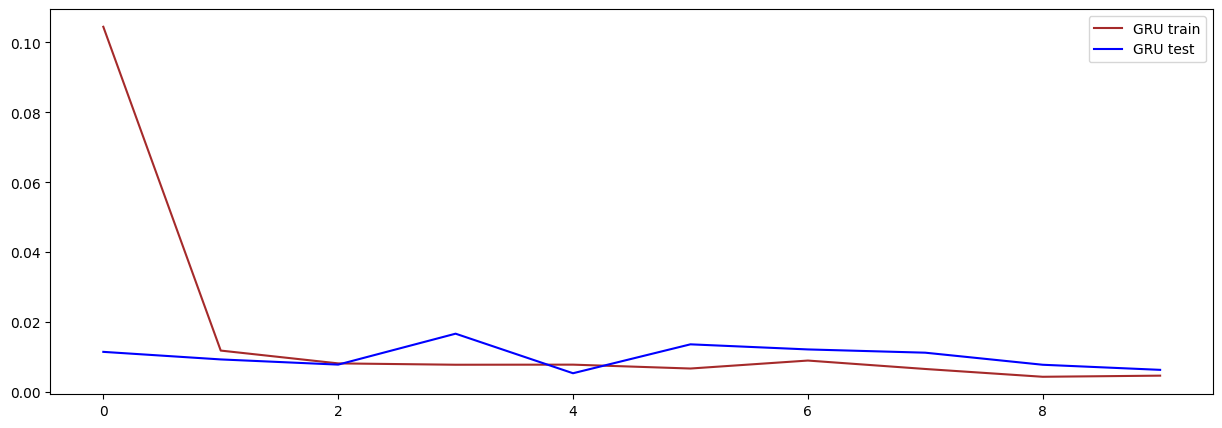

In [1500]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [1419]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [1420]:
np.shape(pred_y)

(8068, 1)

In [1421]:
pred_y

array([[4.6201752e-05],
       [9.9993581e-01],
       [9.9995285e-01],
       ...,
       [3.7393707e-05],
       [3.7388822e-05],
       [3.7385329e-05]], dtype=float32)

In [1422]:
pred_y=np.reshape(pred_y,8068)

2.2052606304508345e-09
0.999999988563983
4.696020262361348e-05
4.5660919152743426e-05


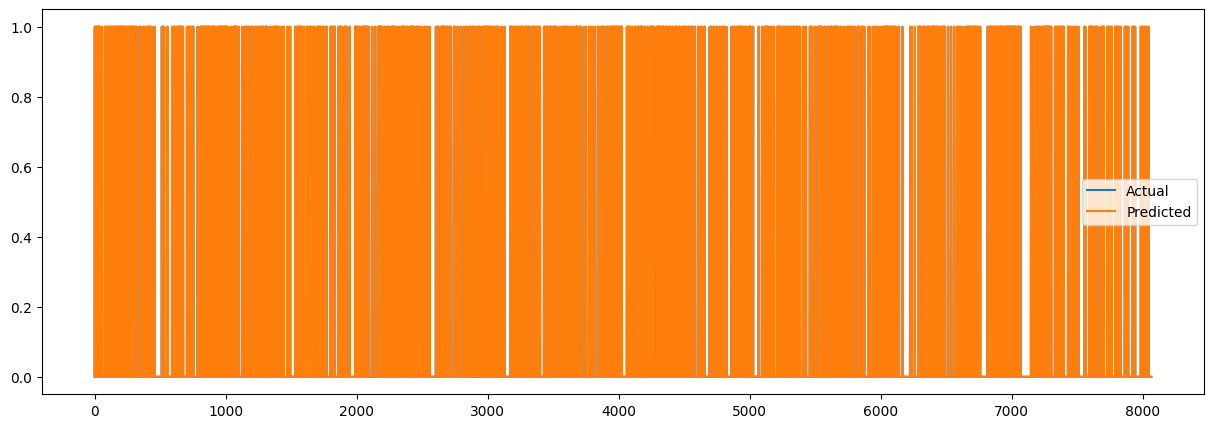

In [1423]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [1424]:
np.shape(train_X)

(32270, 3, 7)

In [1425]:
np.shape(train_y)

(32270, 1)

In [1426]:
np.shape(test_X)

(8068, 3, 7)

In [1427]:
np.shape(test_y)

(8068, 1)

1261/1261 [==============================] - 5s 4ms/step


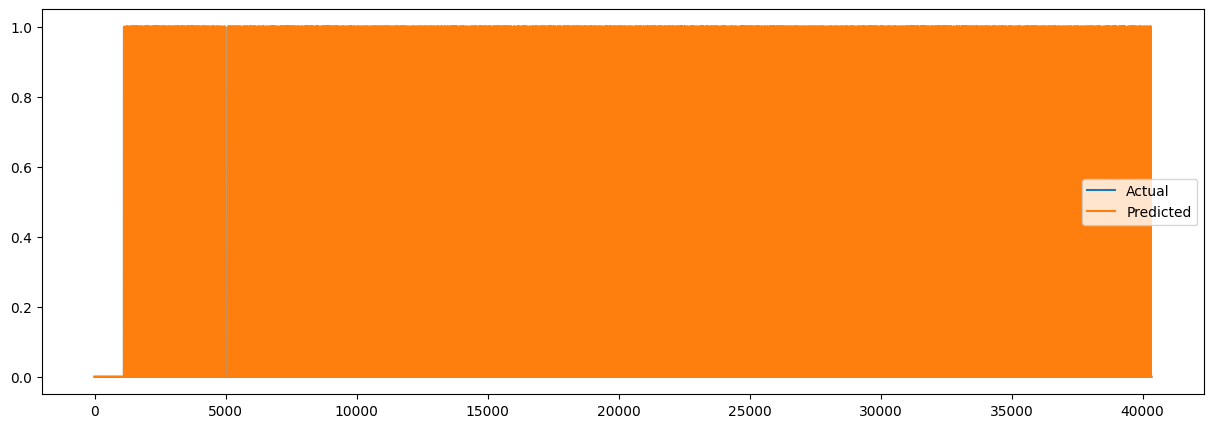

In [1428]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

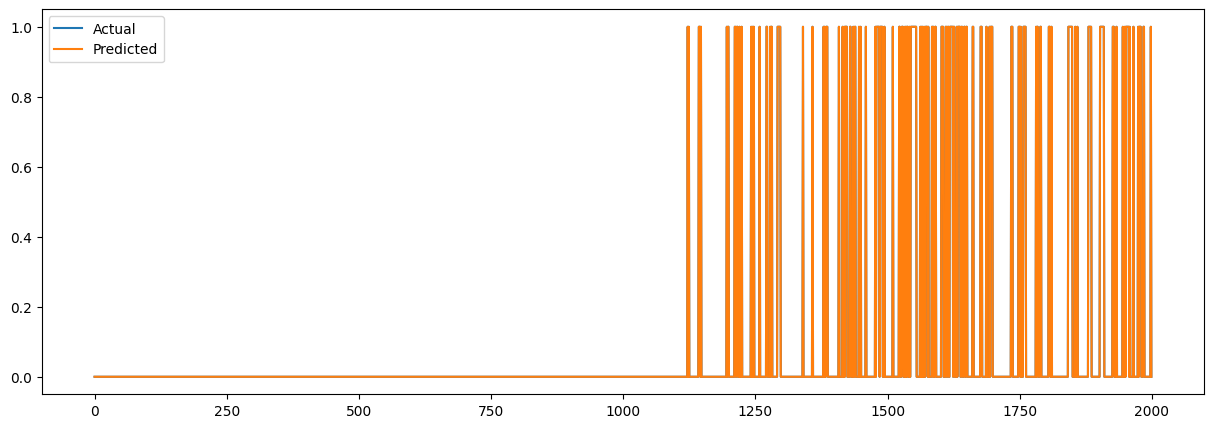

In [1431]:
#over small part of data
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

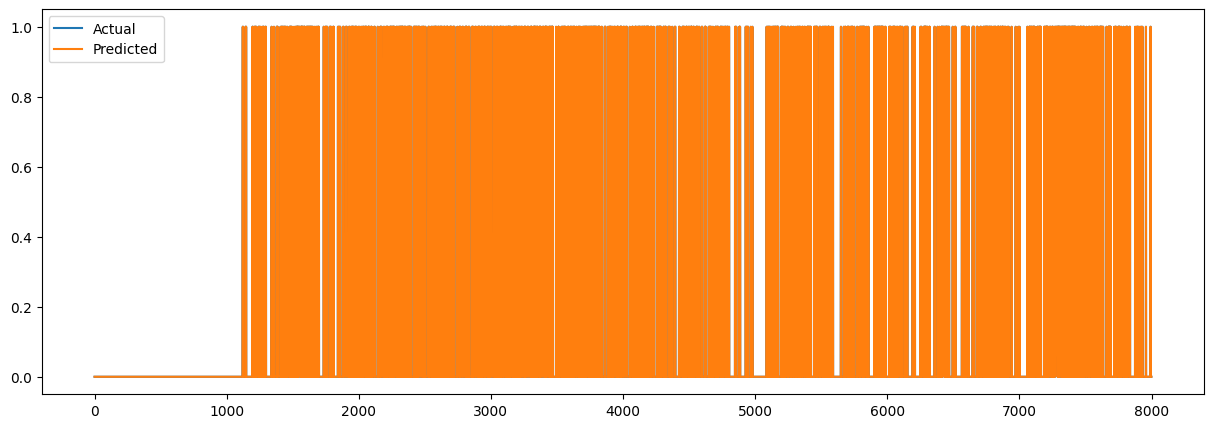

In [1379]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

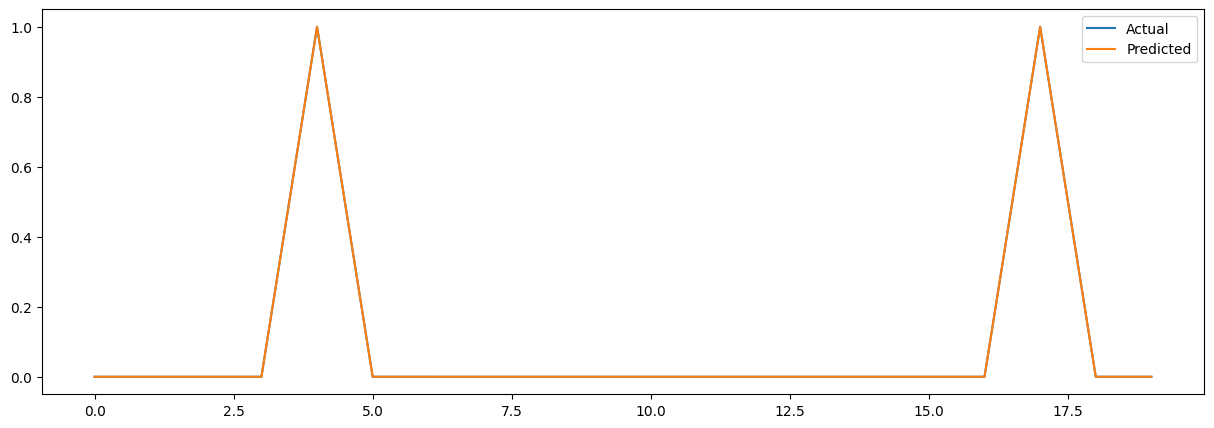

In [1436]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

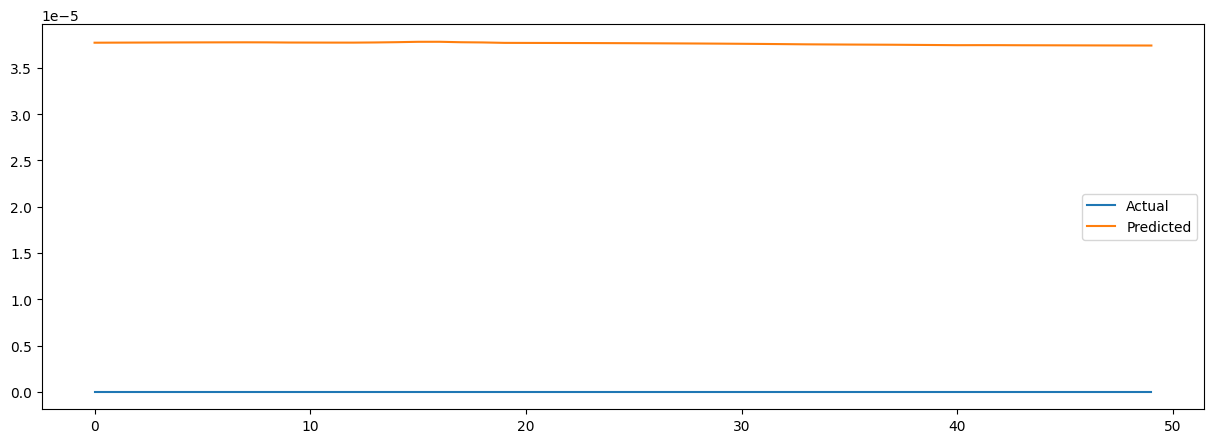

In [1434]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

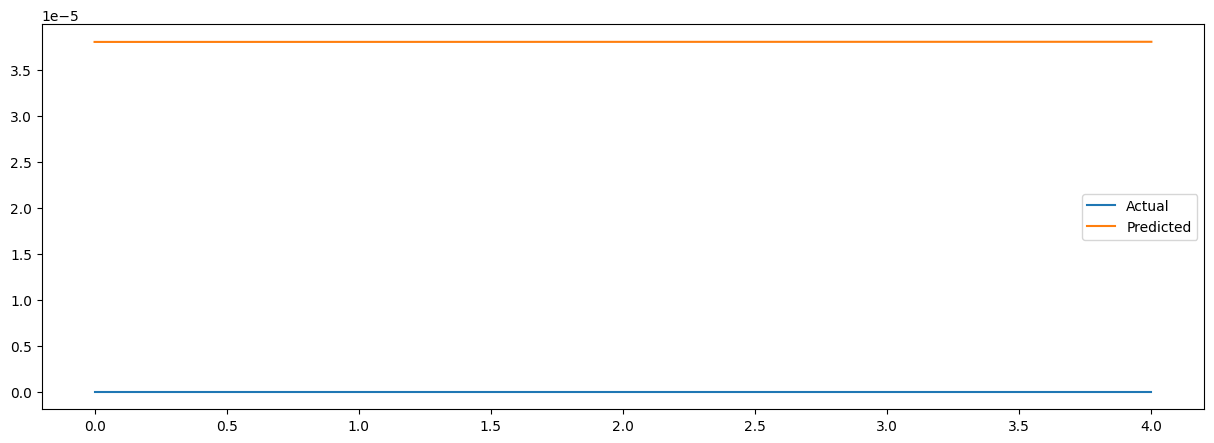

In [1382]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

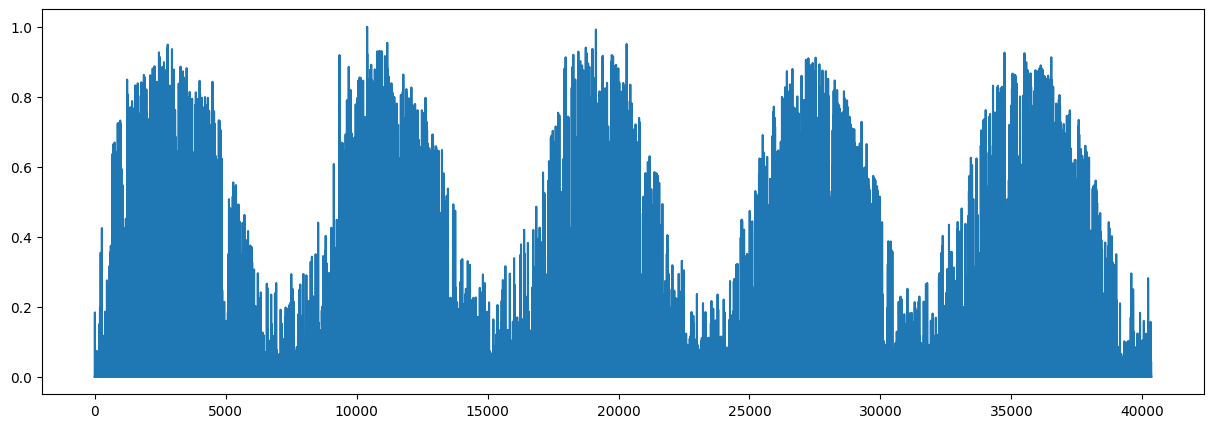

In [747]:
plt.plot(scaled[3], label = 'Actual')

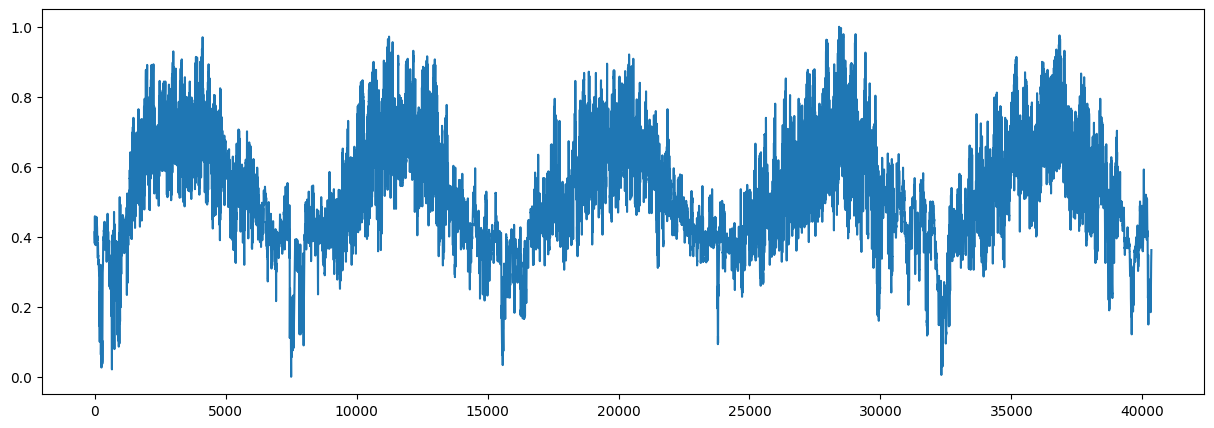

In [544]:
plt.plot(scaled[2], label = 'Actual')

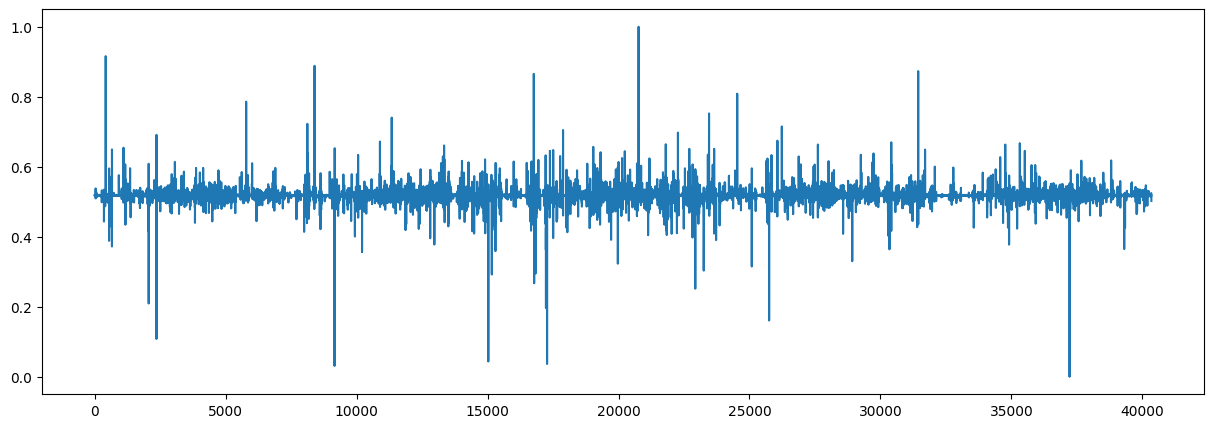

In [545]:
plt.plot(scaled[1], label = 'Actual')

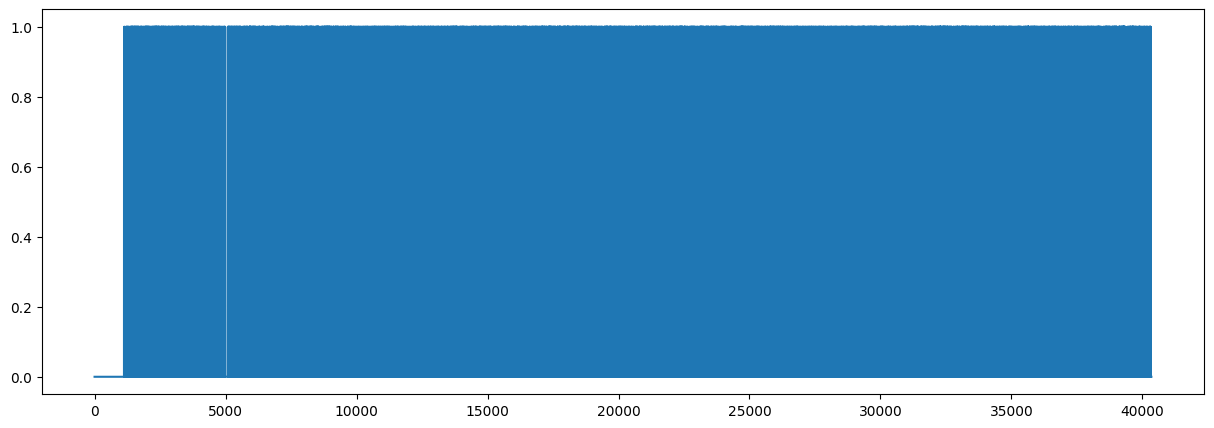

In [546]:
plt.plot(scaled[0], label = 'Actual')

In [ ]:
n_steps = 5
window_length = n_steps + 1 # zmienna docelowa = sygnał wejściowy przesunięty o jeden znak do przodu
dataset['fco2_HQ']=dataset['fco2_HQ'].astype('int64')
dataset2 = tf.data.Dataset.from_tensor_slices(dataset)
dataset2 = dataset2.repeat().window(window_length, shift=1, drop_remainder=True)

In [ ]:
dataset2 = dataset2.flat_map(lambda window: window.batch(window_length))

In [ ]:
batch_size = 32
dataset2 = dataset2.shuffle(10000).batch(batch_size)
dataset2 = dataset2.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset2 = dataset2.prefetch(1)

In [ ]:
#dataset2 = dataset2.map(
 #   lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=1, dtype=tf.float32), Y_batch))

In [ ]:
for X_batch, Y_batch in dataset2.take(1):
    print(X_batch.shape, Y_batch.shape)

In [ ]:
train_size = 40342 * 90 // 100

In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(16, return_sequences=True, input_shape=[None,16],
                     # nie ma porzucania w stanowej sieci rekurencyjnej (https://github.com/ageron/handson-ml2/issues/32)
                     # dropout=0.2, recurrent_dropout=0.2,
                     ),
    keras.layers.GRU(16, return_sequences=True,
                     # dropout=0.2, recurrent_dropout=0.2
                    ),
    keras.layers.TimeDistributed(keras.layers.Dense(1,
                                                    activation="softmax"))
])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model.compile(loss="mse", optimizer="adam")
history = model.fit(dataset2, steps_per_epoch=train_size // batch_size,epochs=10)
#history = model.fit(dataset, epochs=20,validation_data=(X_batch, Y_batch))

In [ ]:
X_new = 
Y_pred = model.predict(X_new)[:, -1,-1][..., np.newaxis]

In [269]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])